# Introduction to the Case Study

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Problem Statement

### Business Understanding:
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
All other cases: All other cases when the payment is paid on time
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### 1. Approved: The Company has approved loan Application
#### 2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the      
#### loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
#### 3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.)
#### 4. Unused offer: Loan has been cancelled by the client but on different stages of the process.

### Business Objective:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# Getting Jupyter ready!

## Importing the libraries.

In [1]:
#import the warnings.
import warnings
#Suppress the warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os # accessing directory structure
import plotly
import plotly.express as px
import matplotlib.style as style
import itertools
%matplotlib inline


# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')


### Adjust Jupyter Views:

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Reading and Understanding the dataset

## Importing the input files

In [4]:
# Reading from read only file "application_data.csv"
ADF = pd.read_csv("application_data.csv")

# Print the first five lines from the input dataset
ADF.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Reading from read only file "previous_application.csv"
PDF = pd.read_csv("previous_application.csv")

# Print the first five lines from the input dataset
PDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking the shape of input dataset ADF
ADF.shape

(307511, 122)

In [7]:
#checking the size of input dataset ADF
ADF.size

37516342

In [8]:
# checking the shape of input dataset PDF
PDF.shape

(1670214, 37)

In [9]:
#checking the size of input dataset PDF
PDF.size

61797918

In [10]:
# checking the dtype of input dataset ADF
ADF.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
# checking the dtype of input dataset PDF
PDF.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [12]:
# checking info of dataset ADF
ADF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [13]:
# checking info of dataset PDF
PDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
#describe the dataset ADF
ADF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [15]:
#describe the dataset PDF
PDF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Merging the dataframes (ADF and PDF)

In [16]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
df=pd.merge(ADF,PDF, how="inner",on="SK_ID_CURR" )

#printing the first five rows
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [17]:
#printng the shape of the merged dataframe
df.shape

(1413701, 158)

Inference : We can see clearly from the previous application(PDF) and Application Data(ADF) when merged together results in
    greater number of source records from the base dataframes, along with increased number of columns as well.

In [18]:
#printing the size of the merged dataframe
df.size

223364758

Inference : The size of the new merged dataframe is also significantly much more than the two base dataframes.

In [19]:
#printing the datatype of fields in the merged dataframe
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE_x                object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Inference : We can clearly observe from the above list of columns and their datatypes, that there are majority of columns
    in numerical format which means that their datatype is either Int64 or Float64, in comparison to other string datatype
    columns with datatype as object.

In [20]:
#printing the info of the fields of the merged dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 158 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE_x          object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT_x                  float64
 9   AMT_ANNUITY_x                 float64
 10  AMT_GOODS_PRICE_x             float64
 11  NAME_TYPE_SUITE_x             object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED        

In [21]:
#describing the merged dataframe
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,476495.000000,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,616842.000000,1.411880e+06,1.171859e+06,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.

# Data Cleaning and Manipulation

## NULL Value Calculation

In [22]:
#calculating the percentage of null values in each column, rounded off to 2 decimal places
round(df.isnull().sum()/df.shape[0]*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.29
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

Inference:
There are many columns in merged dataframe "df" where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

In [23]:
#creating a new dataframe from the null value columns
nulldf = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()

#Renaming the columns of the dataframe
nulldf.columns = ["Column_name","Null_percentage"]

#printing the new dataframe
nulldf

,Column_name,Null_percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE_x,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT_x,0.000000
9,AMT_ANNUITY_x,0.006578


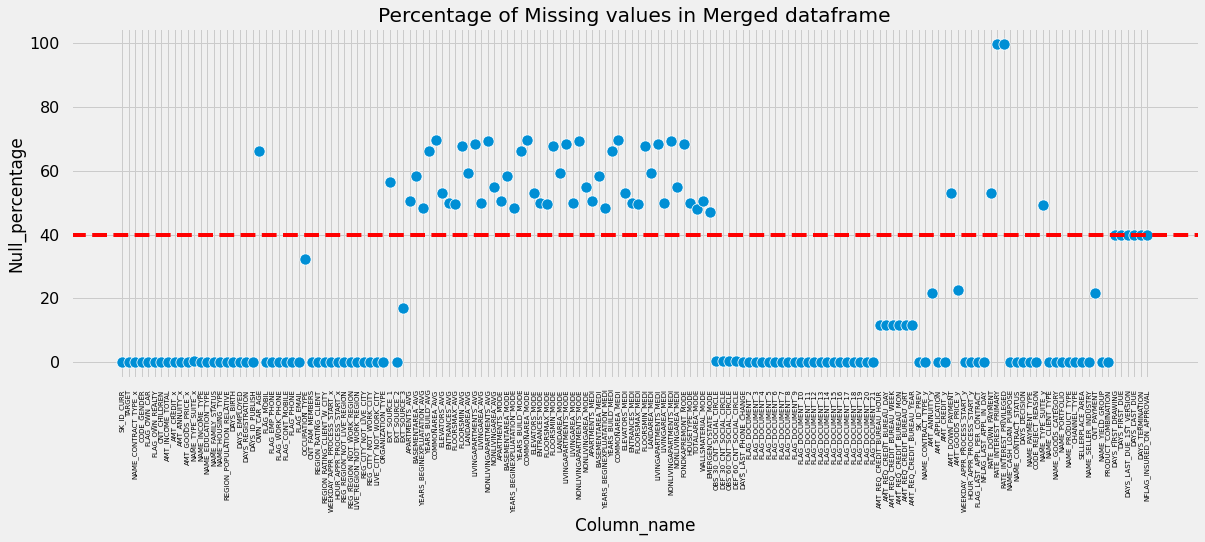

In [24]:
# plotting a scatter plot for column_name vs Null_percentage

#setting figure size of the plot
fig = plt.figure(figsize=(18,6))

#creating a variable for plotting the scatter plot
ax = sns.scatterplot(x = "Column_name" , y = "Null_percentage" , data = nulldf , markers = True)

#setting the title of the plot
plt.title("Percentage of Missing values in Merged dataframe")

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =7)

#plotting a horizontal line at 40% y value
ax.axhline(40, ls='--',color='red')

#setting the axis labels
plt.ylabel("Null_percentage")
plt.xlabel("Column_name")

#Showing the plot
plt.show()

Inference:
From the above scatter plot we can see that we have tried to plot all the columns  with respect to the percentage of null values present in them to a greater extent. So if we concentrate on those points which lie above the 40% null marker then we can understand that there are around 50 columns where the percentage of null values is present in more than 40% ratio. So, ultimately we need to treat these columns in order to normalize the dataframe for further analysis.

In [25]:
#creating a new filtered dataframe where null_percentage is greater than equal to 40
nulldf_40 = nulldf[nulldf["Null_percentage"]>=40]

#printing the new dataframe
nulldf_40

,Column_name,Null_percentage
21,OWN_CAR_AGE,66.294499
41,EXT_SOURCE_1,56.366870
44,APARTMENTS_AVG,50.364115
45,BASEMENTAREA_AVG,58.308511
46,YEARS_BEGINEXPLUATATION_AVG,48.431882
47,YEARS_BUILD_AVG,66.298107
48,COMMONAREA_AVG,69.689347
49,ELEVATORS_AVG,52.996779
50,ENTRANCES_AVG,49.995155
51,FLOORSMAX_AVG,49.409882


In [26]:
#counting the columns where null percentage is more than and equal to 40 for the merged dataframe
count_null_40 = len(nulldf_40)
count_null_40

54

Inference : (1) From the above calculations and steps we are now able to recognize that out of all the 158 columns of  
    the merged dataframe, there are actually 54 such columns where the null percentage of records in the columns is more
    than 40% value.
    
(2) In case we take a deeper look at the fields which have more than 40 percent null value, then we can see that  most of the columns are actually related to the attributes and properties of the Current living zone of the loan applicant, which can either be Rented/Owned apartment or house.
    
In order to further analyze the dataframe and work on finding inferences, we require to handle these 54 columns for
their nullability, either by completely dropping these columns or filling in some appropriate value in place of the null.

In [27]:
#sorting the dataframe nulldf_40 with respect to column Null_percentage in descending order
nulldf_40.sort_values(by="Null_percentage", ascending=False, inplace=True)
nulldf_40

,Column_name,Null_percentage
135,RATE_INTEREST_PRIVILEGED,99.661102
134,RATE_INTEREST_PRIMARY,99.661102
62,COMMONAREA_MODE,69.689347
76,COMMONAREA_MEDI,69.689347
48,COMMONAREA_AVG,69.689347
70,NONLIVINGAPARTMENTS_MODE,69.296549
84,NONLIVINGAPARTMENTS_MEDI,69.296549
56,NONLIVINGAPARTMENTS_AVG,69.296549
86,FONDKAPREMONT_MODE,68.216264
54,LIVINGAPARTMENTS_AVG,68.214566


## Analysing and Handling the Columns with Null values or Low corelations

### Analysis and Handling EXT_SOURCE_X Columns

In [28]:
# Creating a new dataframe to find the corelation between EXT_SOURCE_X and TARGET Columns
df_ext = df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]

# printing df_ext dataframe
df_ext

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,NaN,0
2,0.311267,0.622246,NaN,0
3,0.311267,0.622246,NaN,0
4,NaN,0.555912,0.729567,0
...,...,...,...,...
1413696,0.734460,0.708569,0.113922,0
1413697,0.734460,0.708569,0.113922,0
1413698,0.734460,0.708569,0.113922,0
1413699,0.734460,0.708569,0.113922,0


In [29]:
# Creating a corelation dataframe on the basis of df_ext
df_ext_corr = df_ext.corr()

# printing the corelation Matrix
df_ext_corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.000000,0.202980,0.180146,-0.153307
EXT_SOURCE_2,0.202980,1.000000,0.107662,-0.155026
EXT_SOURCE_3,0.180146,0.107662,1.000000,-0.188187
TARGET,-0.153307,-0.155026,-0.188187,1.000000


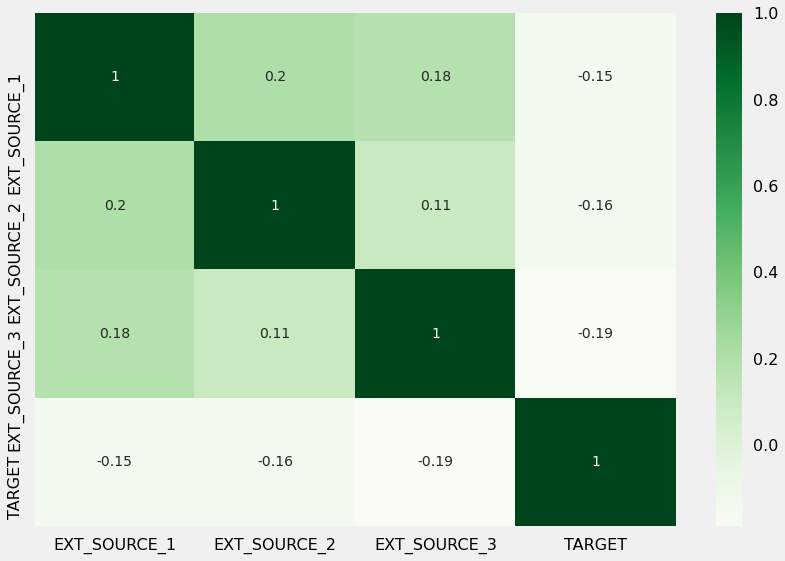

In [30]:
# plotting Heatmap on the basis of corelation Matrix of df_ext dataframe
sns.heatmap(df_ext_corr , xticklabels=df_ext_corr.columns,yticklabels=df_ext_corr.columns,annot = True,cmap ="Greens" )
plt.show()

Inference: From the above heatmap if we compare EXT_SOURCE_1 to EXT_SOURCE_3 with respect to TARGET Column then we see that the
    corelation between them Falls on the negative side of the Scale which represents that there is very weak corelation between 
    the EXT fields and the TARGET fields. 
    
   Statistically speaking we see that EXT_SOURCE_1 has around 56% null values, EXT_SOURCE_3 has around 17% null values, 
    and their corelation with TARGET field is less than zero respectively, thus we reach the conclusion that we can
    easily drop the 3 EXT_SOURCE_X columns from the merged dataframe df.

### Adding Columns to the unwanted list of columns

In [31]:
#creating a list of column names from the nulldf_40 dataframe and adding 2 EXT_SOURCE columns
unwanted_columns = nulldf_40['Column_name'].tolist() + ['EXT_SOURCE_2','EXT_SOURCE_3']

#printing the list of unwanted columns
unwanted_columns

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMA

In [32]:
#Printing the length of the unwanted columns list
len(unwanted_columns)

56

#### Flag Document fields Corelation analysis 

In [33]:
#checking the relevance and corelation of FLAG columns of the merged dataframe by creating a new dataframe df_flag

#list of flag document columns
col_flag = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

#creating a dataframe with the flag document columns and TARGET column
df_flag = df[col_flag+["TARGET"]]

#printing the dataframe
df_flag

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413697,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413698,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413699,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#length of flag_document columns
length = len(col_flag)

#printing length of col_flag
length

20

In [35]:
#replacing the data in the TARGET column of the df_flag dataframe
df_flag['TARGET'] = df_flag['TARGET'].replace({1:'Defaulter',0:'Repayer'})

#printing the df_flag dataframe's TARGET column
df_flag[['TARGET']]

,TARGET
0,Defaulter
1,Repayer
2,Repayer
3,Repayer
4,Repayer
...,...
1413696,Repayer
1413697,Repayer
1413698,Repayer
1413699,Repayer


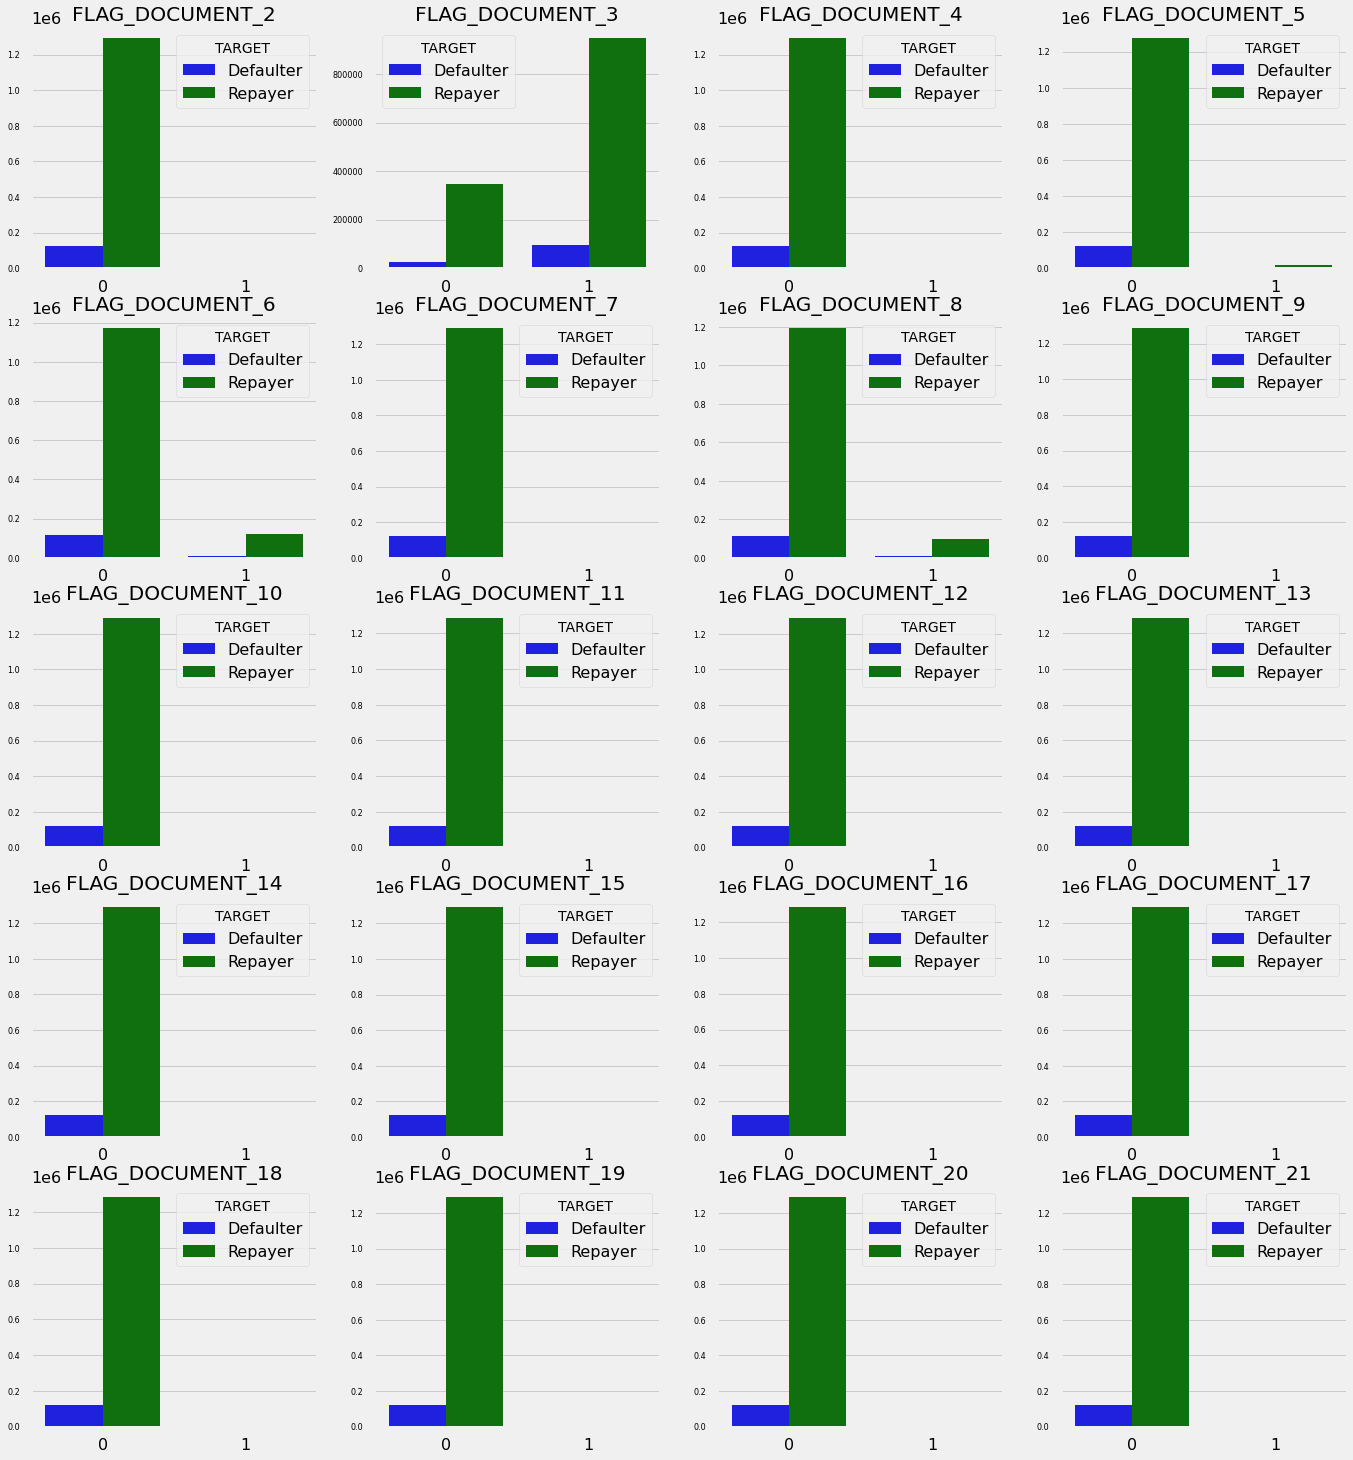

In [36]:
#plotting a countplot graphs

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_flag,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["b","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

Inference : From the above countplots we can observe that only flag document 3 has been submitted in high number or volume,
    for both repayer and defaulter type of people. Other than that all the other countplots dont have any data against the
    defaulter x-axis value, and the plot shows that presence of the other respective documents results in lesser risk of 
    loan default.
    
   Thus, we can see that there no strong corelation between the other flag document X column and Target column, and thus 
    we can drop them except the flag_document_3 column.

In [37]:
# Removing FLAG_DOCUMENT_3 column from col_flag list
col_flag.remove('FLAG_DOCUMENT_3')

# Adding flag Document unwanted columns to unwanted_columns
unwanted_columns = unwanted_columns + col_flag

# printing length of unwanted_columns
len(unwanted_columns)

75

#### Contact Parameters corelation analysis 

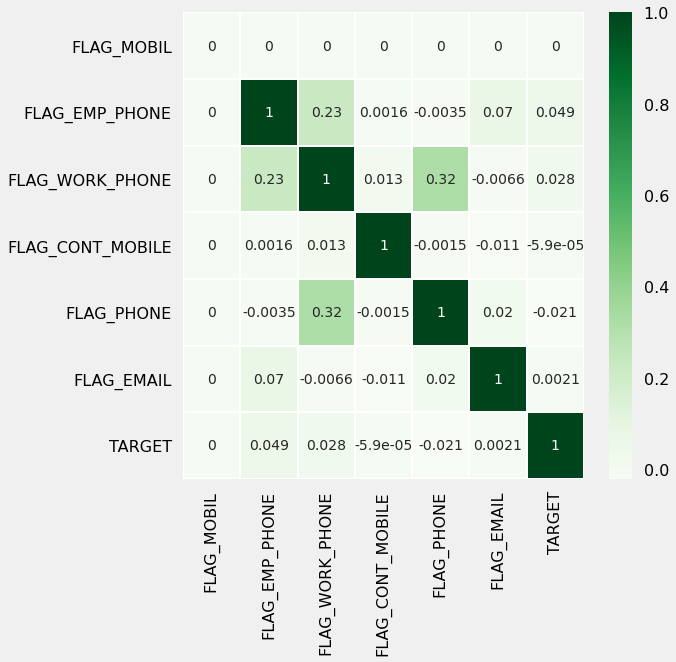

In [38]:
#Checking the corelation between the contact parameters like mobile Phone, Phone, Work Phone, Email etc.
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']

# Filling '0' instead of 'NAN' in contact corelation table
Contact_corr = df[contact_col].corr().fillna(0)

# plotting Heatmap for corelation between the columns
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
xticklabels=Contact_corr.columns,
yticklabels=Contact_corr.columns,
annot = True,
cmap ="Greens",
linewidth=1)


Inference : We can clearly see from the heatmap plot above that there are no green coloured fields, which means there is
    no such strong corelation between the contact parameters and the TARGET column. Thus, we can drop these columns from the
    merged dataframe.

In [39]:
# Removing TARGET column from the contact_col list
contact_col.remove('TARGET')

# Adding contact_col columns to unwanted_columns list
unwanted_columns = unwanted_columns + contact_col

# printing length of unwanted_columns list
len(unwanted_columns)

81

In [40]:
# Naming some other unwanted columns from dataframe df 
unwanted_col = ['WEEKDAY_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_x', 'WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

#adding these columns to the unwanted_columns list
unwanted_columns = unwanted_columns + unwanted_col

#printing the length of unwanted_columns list
length = len(unwanted_columns)
length



87

Inference : From the above calculations, we can be sure that from the merged dataframe df, we can drop 87 columns in total
    which are not required for further inference analysis and inspection.

### Dropping the unwanted columns from merged dataframe df

In [41]:
df.drop(labels=unwanted_columns , axis=1 , inplace=True)

#printing shape of merged dataframe df after removing unwanted columns
df.shape


(1413701, 71)

Inference: After dropping the unwanted columns from the merged dataframe df the remaining columns are 71 in count.

In [42]:
# printing the info of the merged dataframe df after dropping the unwanted columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 71 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT_x                 1413701 non-null  float64
 9   AMT_ANNUITY_x                1413608 non-null  float64
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64
 11  NAME_TYPE_SUITE_x            1410175 non-null  object 
 12  NAME_INCOME_TYPE             1413701 non-n

Inference: From the above info if we check the non-null count for each column then we can observe that there are huge number of
    non-null records.

## Standardize Values

### Converting columns with days values into columns with absolute values 

In [43]:
# creating a list of columns with days value
Date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' , 'DAYS_DECISION','DAYS_LAST_PHONE_CHANGE',
            'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']

# converting negative days to positive day values
for col in Date_col:
    df[col] = abs(df[col])
    
# printing the values of the days columns after absolute conversion
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' , 'DAYS_DECISION','DAYS_LAST_PHONE_CHANGE',
    'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_DECISION,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,9461,637,3648.0,2120,606,1134.0,365243.0,565.0,125.0,25.0,17.0
1,16765,1188,1186.0,291,746,828.0,365243.0,716.0,386.0,536.0,527.0
2,16765,1188,1186.0,291,828,828.0,365243.0,797.0,647.0,647.0,639.0
3,16765,1188,1186.0,291,2341,828.0,365243.0,2310.0,1980.0,1980.0,1976.0
4,19046,225,4260.0,2531,815,815.0,365243.0,784.0,694.0,724.0,714.0
...,...,...,...,...,...,...,...,...,...,...,...
1413696,16856,1262,5128.0,410,648,787.0,365243.0,618.0,72.0,558.0,528.0
1413697,16856,1262,5128.0,410,456,787.0,NaN,NaN,NaN,NaN,NaN
1413698,16856,1262,5128.0,410,171,787.0,NaN,NaN,NaN,NaN,NaN
1413699,16856,1262,5128.0,410,787,787.0,365243.0,756.0,294.0,66.0,64.0


### Filling in Zero for NaN values for Null percentage columns between 30 to 40  

In [44]:
#finding out percentage of null values in each column of merged dataframe df
null_percent = pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,2)).reset_index()

#renaming columns
null_percent.columns = ['column_name','null_percentage']

#printing the new dataframe with null percentages for each column
null_percent

,column_name,null_percentage
0,SK_ID_CURR,0.00
1,TARGET,0.00
2,NAME_CONTRACT_TYPE_x,0.00
3,CODE_GENDER,0.00
4,FLAG_OWN_CAR,0.00
5,FLAG_OWN_REALTY,0.00
6,CNT_CHILDREN,0.00
7,AMT_INCOME_TOTAL,0.00
8,AMT_CREDIT_x,0.00
9,AMT_ANNUITY_x,0.01


In [45]:
#creating new dataframe where null percentage is greater than equal to 30 percent
null_percent_30 = null_percent[null_percent["null_percentage"]>=30]

#creating new dataframe where null percentaage is less than 40 percent
null_percent_30_40 = null_percent_30[null_percent_30["null_percentage"]<40]

#printing the new dataframe null_percent_30_40
null_percent_30_40

,column_name,null_percentage
21,OCCUPATION_TYPE,32.37
65,DAYS_FIRST_DRAWING,39.69
66,DAYS_FIRST_DUE,39.69
67,DAYS_LAST_DUE_1ST_VERSION,39.69
68,DAYS_LAST_DUE,39.69
69,DAYS_TERMINATION,39.69
70,NFLAG_INSURED_ON_APPROVAL,39.69


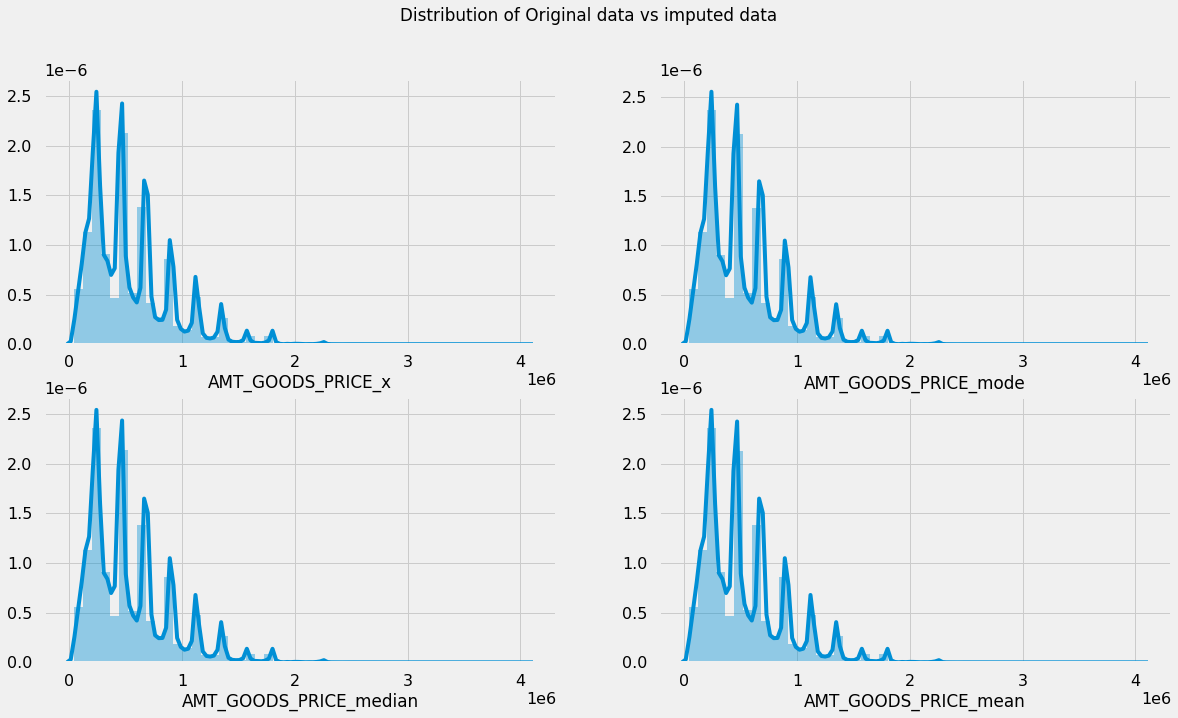

In [46]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = df['AMT_GOODS_PRICE_x'].fillna(df['AMT_GOODS_PRICE_x'].mode()[0])
statsDF['AMT_GOODS_PRICE_median']= df['AMT_GOODS_PRICE_x'].fillna(df['AMT_GOODS_PRICE_x'].median())
statsDF['AMT_GOODS_PRICE_mean'] = df['AMT_GOODS_PRICE_x'].fillna(df['AMT_GOODS_PRICE_x'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(df['AMT_GOODS_PRICE_x'][pd.notnull(df['AMT_GOODS_PRICE_x'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

Inference : From the above distplot, one can see that when we fill the column AMT_GOODS_PRICE_x with mean, median and mode values,
    then after plotting the graph we can clearly see that the graphs of respective fillings is exactly similar to
    the one where there is nothing filled in the place of NaN values. We also, conclude that the mean, median and mode values for
    given column is biased/skewed to the left side and is thus filled with 0, as they all are equal.

In [47]:
#Filling in 0 for every NaN value in the respective columns
for i in null_percent_30_40["column_name"]:
    df[i]=df[i].fillna(0)
    
#Checking the count of null values in each of these columns
for i in null_percent_30_40["column_name"]:
    print(df[[i]].isnull().sum())

OCCUPATION_TYPE    0
dtype: int64
DAYS_FIRST_DRAWING    0
dtype: int64
DAYS_FIRST_DUE    0
dtype: int64
DAYS_LAST_DUE_1ST_VERSION    0
dtype: int64
DAYS_LAST_DUE    0
dtype: int64
DAYS_TERMINATION    0
dtype: int64
NFLAG_INSURED_ON_APPROVAL    0
dtype: int64


In [48]:
#Printing the Days columns to verify if the Null Value standardization worked or not
df[['OCCUPATION_TYPE' , 'DAYS_FIRST_DRAWING' , 'DAYS_FIRST_DUE' , 'DAYS_LAST_DUE_1ST_VERSION' , 'DAYS_LAST_DUE' , 'DAYS_TERMINATION' , 'NFLAG_INSURED_ON_APPROVAL' ]]

,OCCUPATION_TYPE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,Laborers,365243.0,565.0,125.0,25.0,17.0,0.0
1,Core staff,365243.0,716.0,386.0,536.0,527.0,1.0
2,Core staff,365243.0,797.0,647.0,647.0,639.0,0.0
3,Core staff,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,Laborers,365243.0,784.0,694.0,724.0,714.0,0.0
...,...,...,...,...,...,...,...
1413696,Laborers,365243.0,618.0,72.0,558.0,528.0,1.0
1413697,Laborers,0.0,0.0,0.0,0.0,0.0,0.0
1413698,Laborers,0.0,0.0,0.0,0.0,0.0,0.0
1413699,Laborers,365243.0,756.0,294.0,66.0,64.0,0.0


### Numerical column to Categorical Column conversion

#### 1. AMT_INCOME_TOTAL

In [49]:
#current state of AMT_INCOME_TOTAL column
df[["AMT_INCOME_TOTAL"]]

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,270000.0
3,270000.0
4,67500.0
...,...
1413696,157500.0
1413697,157500.0
1413698,157500.0
1413699,157500.0


In [50]:
#Binning values to Categorical Bins

#Conversion of AMT_INCOME_TOTAL to Million range
df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"]/100000

#creating bins and slots
bins = [0,1,2,3,4,5,6,7,8,9,10,11]

slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M',
        '1M Above']

#Conversion from numerical to categorical based on slots and bins created above
df["AMT_INCOME_RANGE"] = pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

#printing the newly created column AMT_INCOME_RANGE
df[["AMT_INCOME_TOTAL","AMT_INCOME_RANGE"]]

,AMT_INCOME_TOTAL,AMT_INCOME_RANGE
0,2.025,200k-300k
1,2.700,200k-300k
2,2.700,200k-300k
3,2.700,200k-300k
4,0.675,0-100K
...,...,...
1413696,1.575,100K-200K
1413697,1.575,100K-200K
1413698,1.575,100K-200K
1413699,1.575,100K-200K


In [51]:
#printing value counts of the AMT_INCOME_RANGE after normalization
df["AMT_INCOME_RANGE"].value_counts(normalize=True)*100

100K-200K    51.147822
200k-300k    23.483890
0-100K       17.684059
300k-400k     5.217533
400k-500k     1.766212
500k-600k     0.355054
600k-700k     0.225545
800k-900k     0.071903
700k-800k     0.039561
900k-1M       0.006794
1M Above      0.001628
Name: AMT_INCOME_RANGE, dtype: float64

Inference : If we check the above Value counts output, then we can be sure that more than 50% of the applicants
    have Total Income in the range of 100K-200K. The next highest proportion of the people lie in the range of 
    200K-300K with percentage of 23%.
    
   If we aggregate the above percentages and their respective value range, then we observe that around 96% applicants
    for loan have Income below 400K range.

#### 2. AMT_CREDIT

In [52]:
#Printing the current state of AMT_CREDIT columns from ADF and PDF, after merging the dataframes, to create df.
df[["AMT_CREDIT_x","AMT_CREDIT_y"]]

,AMT_CREDIT_x,AMT_CREDIT_y
0,406597.5,179055.0
1,1293502.5,1035882.0
2,1293502.5,348637.5
3,1293502.5,68053.5
4,135000.0,20106.0
...,...,...
1413696,675000.0,254340.0
1413697,675000.0,45000.0
1413698,675000.0,1067940.0
1413699,675000.0,1271929.5


In [53]:
#Binning values to categorical bins

#Conversion of values to a million range
df["AMT_CREDIT_x"]=df["AMT_CREDIT_x"]/100000
df["AMT_CREDIT_y"]=df["AMT_CREDIT_y"]/100000

#creating slots and bins
bins = [0,1,2,3,4,5,6,7,8,9,10,100]

slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M',
        '1M Above'] 

#conversion of Numerical to categorical values
df["AMT_CREDIT_RANGE_x"]=pd.cut(df['AMT_CREDIT_x'],bins, labels=slot)
df["AMT_CREDIT_RANGE_y"]=pd.cut(df['AMT_CREDIT_y'],bins, labels=slot)

#Printing the converted values
df[["AMT_CREDIT_x","AMT_CREDIT_RANGE_x","AMT_CREDIT_y","AMT_CREDIT_RANGE_y"]]

,AMT_CREDIT_x,AMT_CREDIT_RANGE_x,AMT_CREDIT_y,AMT_CREDIT_RANGE_y
0,4.065975,400k-500k,1.790550,100K-200K
1,12.935025,1M Above,10.358820,1M Above
2,12.935025,1M Above,3.486375,300k-400k
3,12.935025,1M Above,0.680535,0-100K
4,1.350000,100K-200K,0.201060,0-100K
...,...,...,...,...
1413696,6.750000,600k-700k,2.543400,200k-300k
1413697,6.750000,600k-700k,0.450000,0-100K
1413698,6.750000,600k-700k,10.679400,1M Above
1413699,6.750000,600k-700k,12.719295,1M Above


In [54]:
#performing Value counts for the created column AMT_CREDIT_RANGE_x (Current Year Applications)
df["AMT_CREDIT_RANGE_x"].value_counts(normalize=True)*100

200k-300k    17.871459
1M Above     15.415353
500k-600k    11.345468
400k-500k    10.883490
100K-200K     9.280109
300k-400k     8.979056
600k-700k     7.832986
800k-900k     6.815585
700k-800k     6.393290
900k-1M       2.990802
0-100K        2.192401
Name: AMT_CREDIT_RANGE_x, dtype: float64

Inference : If we check the above value count statistics, then we can clearly see that maximum number of loan applicants i.e. 17
    percent have been sanctioned a loan in the amount range 200K-300K. The next highest bucket of applicants goes to 15% where the amount
    of loan sanctioned or the Credit Amount is 1 Million or above.
    
Checking the minimum proportion of applicants, we see that least is 2% percent applicants have received a loan in the range
    of 0-100K. Thus, this means that the bank is more biased towards giving a loan worth high range amounts.
    
   Also, Almost 53% of the applicants have been provided a credit limit range in between 200K and above.

In [55]:
#performing value counts for the created column AMT_CREDIT_RANGE_y (Previous Year Applications)
df["AMT_CREDIT_RANGE_y"].value_counts(normalize=True)*100

0-100K       45.438884
100K-200K    22.087496
200k-300k    10.192037
1M Above      4.776264
400k-500k     4.546826
300k-400k     4.232700
500k-600k     2.841469
700k-800k     1.954142
600k-700k     1.620933
800k-900k     1.567113
900k-1M       0.742136
Name: AMT_CREDIT_RANGE_y, dtype: float64

Inference : Checking the value count statistics for the previous year, we observe that the highest proportion of the sanctioned
    loan applications last year were almost 45% where the credit range was between 0-100K.
    
   The minimum proportion of applications approved were 0.7% where the credit limit sanctioned was between 900K-1M.
    
   Also, when we aggregate the previous year data, then we see that 77% percent of the total applications which were sanctioned
    was in the range of 0-300K, which thus means that last year bank was more biased towards passing loans with lesser amount of money.

#### 3. DAYS_BIRTH 

In [56]:
# Printing the current state of DAYS_BIRTH Column of dataframe df
df[["DAYS_BIRTH"]]

,DAYS_BIRTH
0,9461
1,16765
2,16765
3,16765
4,19046
...,...
1413696,16856
1413697,16856
1413698,16856
1413699,16856


In [57]:
# Conversion of DAYS_BIRTH to Year
df['AGE'] = df['DAYS_BIRTH'] // 365

# Creating bins and slots for Age
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

#Creating a new categorical column on the basis of Age Numerical column
df['AGE_GROUP']=pd.cut(df['AGE'],bins=bins,labels=slots)

# Printing Converted Values of DAYS_BIRTH
df[["DAYS_BIRTH" , "AGE" , "AGE_GROUP"]]

,DAYS_BIRTH,AGE,AGE_GROUP
0,9461,25,20-30
1,16765,45,40-50
2,16765,45,40-50
3,16765,45,40-50
4,19046,52,50 above
...,...,...,...
1413696,16856,46,40-50
1413697,16856,46,40-50
1413698,16856,46,40-50
1413699,16856,46,40-50


In [58]:
# Printing value counts for newly created column AGE_GROUP
df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    33.508783
30-40       26.578817
40-50       24.656558
20-30       15.255560
0-20         0.000283
Name: AGE_GROUP, dtype: float64

Inference : Taking a good look at the above output, we can be sure that the most number of applicants whose applications
    have been sanctioned or approved belong to the age group 50 and Above, with proportion equal to 33 percent. The next best
    group is 30-40 with 26 percent, since this is the medium age group and also the age group which generally earns a wholesome
    salary.
    
The lowest proportion of approved applications (0.00028%) belong to the age group 0-20, as this is generally the student age 
group and have no stable source of income.

#### 4. DAYS_EMPLOYED

In [59]:
# Printing the current state of DAYS_EMPLOYED Column of dataframe df
df[["DAYS_EMPLOYED"]]

,DAYS_EMPLOYED
0,637
1,1188
2,1188
3,1188
4,225
...,...
1413696,1262
1413697,1262
1413698,1262
1413699,1262


In [60]:
#By Creating a new Column converting the DAYS_EMPLOYED Column to YEARS_EMPLOYED
df['YEARS_EMPLOYED'] = round(df['DAYS_EMPLOYED'] /365,2)

# Creating bins and slots for Employement Time
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

# Creation of new categorical column EMPLOYMENT_YEAR from numerical column YEARS_EMPLOYED
df['EMPLOYMENT_YEAR']=pd.cut(df['YEARS_EMPLOYED'],bins=bins,labels=slots)

#Printing and checking the conversion
df[["DAYS_EMPLOYED" , "YEARS_EMPLOYED" , "EMPLOYMENT_YEAR"]]


,DAYS_EMPLOYED,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,637,1.75,0-5
1,1188,3.25,0-5
2,1188,3.25,0-5
3,1188,3.25,0-5
4,225,0.62,0-5
...,...,...,...
1413696,1262,3.46,0-5
1413697,1262,3.46,0-5
1413698,1262,3.46,0-5
1413699,1262,3.46,0-5


In [61]:
# Checking the value counts of the EMPLOYMENT_YEAR Column
df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         51.447109
5-10        27.806308
10-20       15.837807
20-30        3.728091
30-40        1.088500
40-50        0.092185
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

Inference: By looking at the above data about the employment year of the loan applicants, we can figure out that the 
    maximum number of applicants, about 51 percent, have been employed since 0-5 years. The other inference that can be
    extracted from the data is that the minimum proportion of loan applicants belong to the employment group 50 and above.
    
Another inference is that about 93 percent of the loan applicants are in the range of 0-20 years of Employment. Thus we can
understand that the people who are new to their respective jobs, apply for the loans in huge numbers than those who have 
been working for a longer time.

#### 5. DAYS_DECISION

In [62]:
# Printing the current state of the DAYS_DECISION column
df[["DAYS_DECISION"]]

,DAYS_DECISION
0,606
1,746
2,828
3,2341
4,815
...,...
1413696,648
1413697,456
1413698,171
1413699,787


In [63]:
df['DAYS_DECISION'].value_counts()

245     2184
238     2163
210     2103
224     2059
252     2052
        ... 
2760     134
2921     133
2829     133
2902     110
1          1
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [64]:
# Creating bins and slots for Decision Time
bins = [0,400,800,1200,1600,2000,2400,2800,3200]
slots = ['0-400','400-800','800-1200','1200-1600','1600-2000','2000-2400','2400-2800','2800-3200']

# Creation of new categorical column DECISION_RANGE from numerical column DAYS_DECISION
df['DECISION_RANGE']=pd.cut(df['DAYS_DECISION'],bins=bins,labels=slots)

#Printing and checking the conversion
df[["DAYS_DECISION" , "DECISION_RANGE"]]

,DAYS_DECISION,DECISION_RANGE
0,606,400-800
1,746,400-800
2,828,800-1200
3,2341,2000-2400
4,815,800-1200
...,...,...
1413696,648,400-800
1413697,456,400-800
1413698,171,0-400
1413699,787,400-800


In [65]:
#Printing and checking the value counts after conversion for the newly created column DECISION_RANGE
df['DECISION_RANGE'].value_counts(normalize=True)*100

0-400        38.509487
400-800      21.818051
800-1200     12.304299
1200-1600     7.986979
2400-2800     6.346887
2000-2400     5.886181
1600-2000     5.775832
2800-3200     1.372285
Name: DECISION_RANGE, dtype: float64

Inference : Taking a look at the above value counts data, we understand that the time taken by almost 38 percent of applications 
    in comparison to the previous application decision is in the range of 0-400 days. The second best is at 21 percent, which loan
    applicants have taken 400-800 days to decide on the new loan application relative to the previous application decision date.
    
   About 71 percent of loan applications for the current year fall within the rangee of 0-1200 days in relation to the time
    when the decision for the last loan was taken.

### Data Type Conversion

#### Data type conversion from object and numeric to categorical column of dataframe df

In [66]:
#Printing the info of dataframe df before converting numerical column to categorical column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1410175 non-null  object  
 12  NAME_INCOME_TYPE            

In [67]:
#Conversion of Object and Numerical columns to Categorical Columns of dataframe df
categorical_columns = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY' , 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE_y','DECISION_RANGE'
                      ]
for col in categorical_columns:
    df[col] =pd.Categorical(df[col])

In [68]:
# Printing the info of dataframe df after converting numerical column to categorical column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1410175 non-null  category
 12  NAME_INCOME_TYPE            

Inference: By checking the above info table we can be sure that all the required numeric columns have a data type of either float
    or int. Similarly, we also observe, that there are no more object type columns, and every object type column has been 
    converted to catgeory type or has been categorized. There are even some category columns which have been manually created by
    us for better inference analysis. Thus, we dont have any further data type conversions to be made, and we can proceed with
    inference analysis on the dataframe.

# Data Analysis

## Imbalance Analysis 

In [69]:
#Creating a new dataframe named Imbalance to hold the Target column value counts data without index
Imbalance = df["TARGET"].value_counts().reset_index()

#printing the imbalance dataframe
Imbalance

,index,TARGET
0,0,1291341
1,1,122360


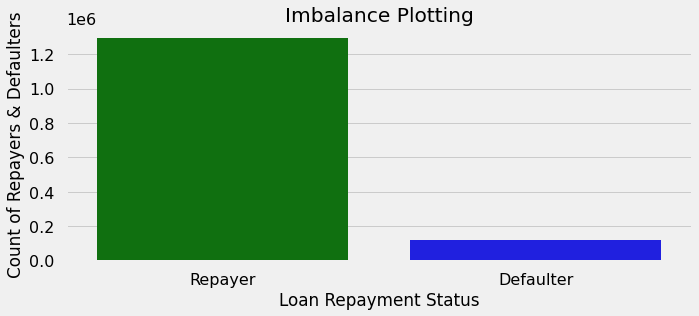

In [70]:
#Plotting the bar graph for the above dataframe

#Setting the figure size
plt.figure(figsize=(10,4))

#Setting the x axis labels and categories
x= ['Repayer','Defaulter']

#Plotting the bar plot
ax = sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','b'])

#setting the x label and y labels
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")

#Setting the title of the plot
plt.title("Imbalance Plotting")

#Showing the plot
plt.show()

Inference : From the above graph we can predict that out of the total values that are present in the TARGET column, if we take 1
    as defaulter and 0 as repayer, the there is an imbalance in the values. 0 taken precendence over the 1 value in this column
    in huge proportion.
    
The proptionate analysis is done below, where we can see the difference in proportion in the values present in the TARGET column.

In [71]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.34 and 8.66
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 10.55 : 1 (approx)


## Univariate Analysis

#### 1. AMT_ANNUITY


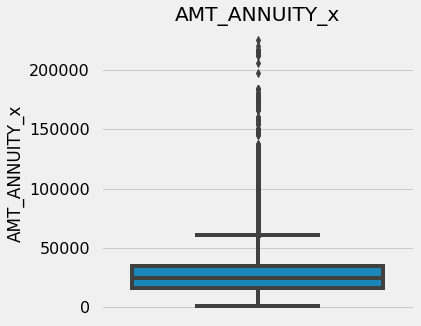

In [72]:
#plotting a box plot on the column AMT_ANNUITY_x from merged dataframe df
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_ANNUITY_x'])
plt.title('AMT_ANNUITY_x')
plt.ylabel('AMT_ANNUITY_x')
plt.show()

Inference : There are a huge number of outliers present in this data for AMT_ANNUITY_x (ADF), and the median lies somewhere 
    around 25000. The upper fence lies around 60000 and lower fence of the data lies at 0.

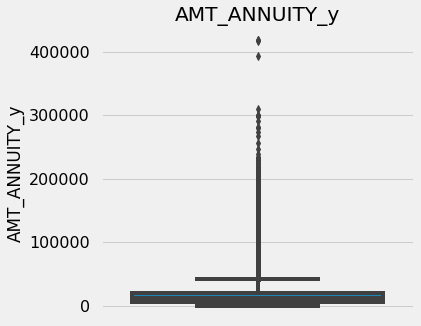

In [73]:
#plotting a box plot on the column AMT_ANNUITY_y
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_ANNUITY_y'])
plt.title('AMT_ANNUITY_y')
plt.ylabel('AMT_ANNUITY_y')
plt.show()

Inference : There are a whole lot of outliers present in the data, where there are some which are extrememly outlying.
    There are only few applicants which can pay the annual annuity amount equal to 400000 approximately. Other outliers lie
    between the range of 50000-300000. Median value is around 25000.

#### 2. AMT_INCOME_TOTAL

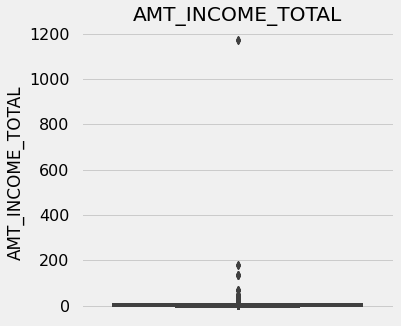

In [74]:
#plotting a box plot on the column AMT_INCOME_TOTAL
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

Inference : There are not many outliers. There are some extremely present outliers, which have salary around 1200K, which seem 
    like an impossible salary or income to have because of the gap present in the outlying salaries/incomes. Most of the incomes
    are present below 200K only. The lower and upper fences along with median value are very close to zero.

#### 3. AMT_CREDIT

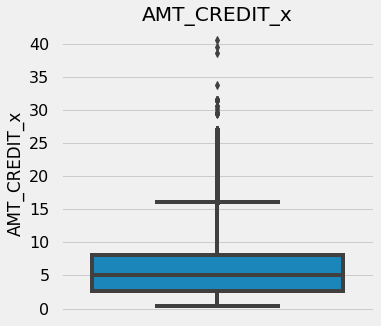

In [75]:
#plotting a box plot on the column AMT_CREDIT_x
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_CREDIT_x'])
plt.title('AMT_CREDIT_x')
plt.ylabel('AMT_CREDIT_x')
plt.show()

Inference : There are again a lot of outliers present, where majority of the credit amounts passed between the range of 0-1500K.
    The majority of outliers are also present in the range of 1500K to 3500K, where there are only some applicants who have been
    sanctioned a credit limit of the same range. The extreme most credit loan amounts are very rare and are found above 3700K 
    approximately. The upper fence lies at around 1500K whereas the median value is lying at 500K. So we can say that the most
    number of loans passed for this year lies in the range of 0-1500K.

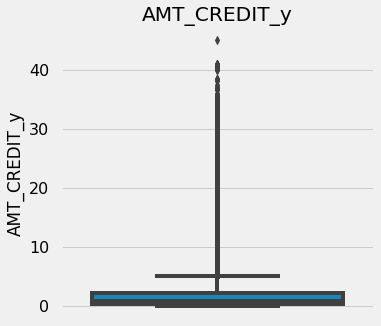

In [76]:
#plotting a box plot on the column AMT_CREDIT_y
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_CREDIT_y'])
plt.title('AMT_CREDIT_y')
plt.ylabel('AMT_CREDIT_y')
plt.show()

Inference : There are a huge number of outliers for the previous year credit loan amount data. The majority of loans passed
    are in the range of 0-500K. The extreme value lies for 4000K or more credit loan amount.

#### 4. AMT_GOODS_PRICE 

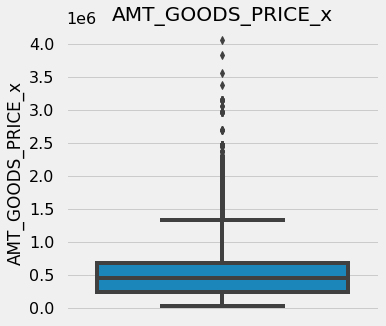

In [77]:
#plotting a box plot on the column AMT_GOODS_PRICE_x
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_GOODS_PRICE_x'])
plt.title('AMT_GOODS_PRICE_x')
plt.ylabel('AMT_GOODS_PRICE_x')
plt.show()

Inference : The majority of the goods bought using the credit loan amount lies in the range of 0 to 150K, along with a huge
    number of outliers where extreme values are present after 250K in a very rare manner for the current fiscal year.

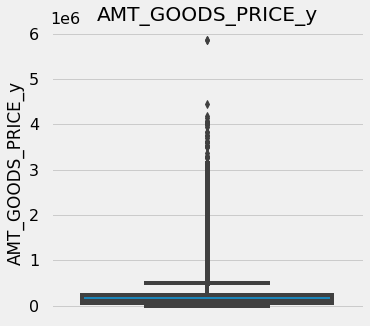

In [78]:
#plotting a box plot on the column AMT_GOODS_PRICE_y
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_GOODS_PRICE_y'])
plt.title('AMT_GOODS_PRICE_y')
plt.ylabel('AMT_GOODS_PRICE_y')
plt.show()

Inference : For the previous year, we see that the majority of the goods bought using the credit loan amount lies in the 
    range of 0-0.5k, which seems like a valid value. Whereas we also see that there are huge number of outliers, where the most
    extreme falls at around 600K, which also seems like a valid value if the largest credit released is also around the same.

#### 5. YEARS_EMPLOYED

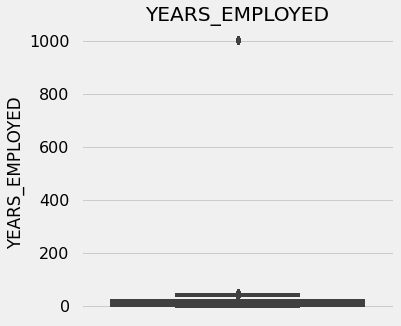

In [79]:
#plotting a box plot on the column YEARS_EMPLOYED
plt.figure(figsize=(5,5))
sns.boxplot(y=df['YEARS_EMPLOYED'])
plt.title('YEARS_EMPLOYED')
plt.ylabel('YEARS_EMPLOYED')
plt.show()

Inference : There are not much outliers present, but the one which is present in clearly an invalid value since no body can be
    employed for around a 1000 years, thus skewing the data plot, and we should ignore that in our future comparisons and 
    analysis. The majority of time period for which an applicant has been employed falls in the valid range of 0-30 years.

#### 6. CNT_CHILDREN

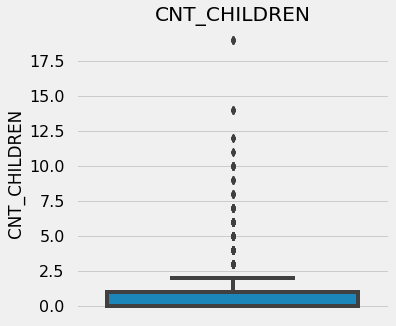

In [80]:
#plotting a box plot on the column CNT_CHILDREN
plt.figure(figsize=(5,5))
sns.boxplot(y=df['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.ylabel('CNT_CHILDREN')
plt.show()

Inference : From the above box plot, we can see that the volume of the box lies in the region of 0-2 children, which means
    that most of the families which applied for the loans this year have had 2 children. Further there are other number of 
    outliers present, which go the extreme of 18 children or more, which seem almost impossible. Majority of the outliers fall 
    in the region of 2 children to 14 children.

#### 7. DAYS_BIRTH

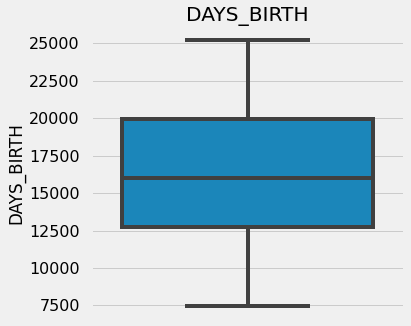

In [81]:
#plotting a box plot on the column DAYS_BIRTH
plt.figure(figsize=(5,5))
sns.boxplot(y=df['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')
plt.ylabel('DAYS_BIRTH')
plt.show()

Inference : There are no outliers present in the data, and all values are valid values in this case.

#### 8. AMT_APPLICATION

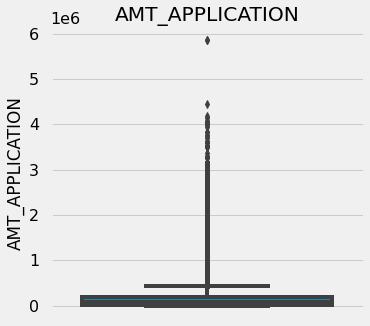

In [82]:
#plotting a box plot on the column AMT_APPLICATION
plt.figure(figsize=(5,5))
sns.boxplot(y=df['AMT_APPLICATION'])
plt.title('AMT_APPLICATION')
plt.ylabel('AMT_APPLICATION')
plt.show()

Inference: There are lots of outliers prsent in the data with extreme values present at around 600k. The majority of data falls in the range of 0-50k.

#### 9. SELLERPLACE_AREA

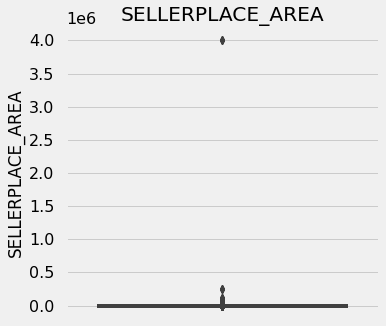

In [83]:
#plotting a box plot on the column SELLERPLACE_AREA
plt.figure(figsize=(5,5))
sns.boxplot(y=df['SELLERPLACE_AREA'])
plt.title('SELLERPLACE_AREA')
plt.ylabel('SELLERPLACE_AREA')
plt.show()

Inference: There are some outliers present in the data, with some extreme values like 400000  which cannot be true or valid.
    The majority of the data lies near 0 as the upper limit, lower limit and median value, all are plotted near zero.

#### 10. SK_ID_CURR

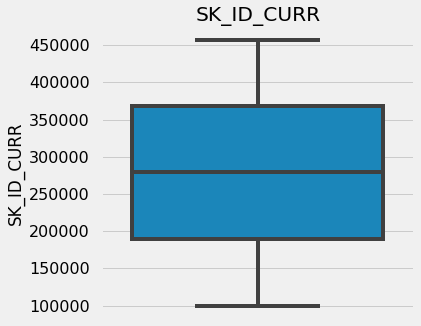

In [84]:
#plotting a box plot on the column SK_ID_CURR
plt.figure(figsize=(5,5))
sns.boxplot(y=df['SK_ID_CURR'])
plt.title('SK_ID_CURR')
plt.ylabel('SK_ID_CURR')
plt.show()

Inference : There are no outliers present in the data, and all values are valid values in this case.

#### 11.CNT_PAYMENT

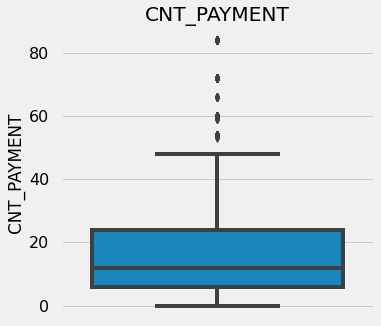

In [85]:
#plotting a box plot on the column CNT_PAYMENT
plt.figure(figsize=(5,5))
sns.boxplot(y=df['CNT_PAYMENT'])
plt.title('CNT_PAYMENT')
plt.ylabel('CNT_PAYMENT')
plt.show()

Inference : There are some outliers present in the data, where the outlier value ranges between 50 and 90. The majority of
    the payment counts at the time of loan application lie in the range of 0-50, with median value at around 10. Thus, most of
    the loan applicants applied for loan, when their loan repayment counts were within 50, and only some applied when the
    count of repayments lie in the range 50-90.

#### 12.DAYS_DECISION

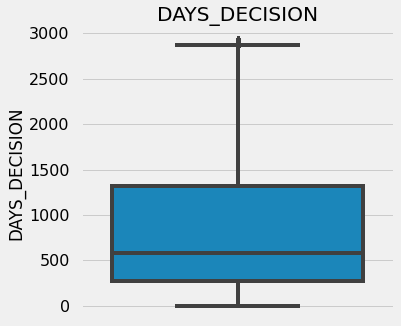

In [86]:
#plotting a box plot on the column DAYS_DECISION
plt.figure(figsize=(5,5))
sns.boxplot(y=df['DAYS_DECISION'])
plt.title('DAYS_DECISION')
plt.ylabel('DAYS_DECISION')
plt.show()

Inference : There are a very less number of outliers present in the data, but that shows that there are some cases where
    days taken to confirm the decision to take credit loan is more than the majority values. The majority of the values lies
    in the range 300 to 1400 days, with median value around 600 days.

### Categorical Analysis 

####  Categorical Univariate Analysis 

#### 1. NAME_CONTRACT_TYPE

In [87]:
#Printing the value counts of the NAME_CONTRACT_TYPE_x column of dataframe ADF
df["NAME_CONTRACT_TYPE_x"].value_counts(normalize=True)*100

Cash loans         92.460499
Revolving loans     7.539501
Name: NAME_CONTRACT_TYPE_x, dtype: float64

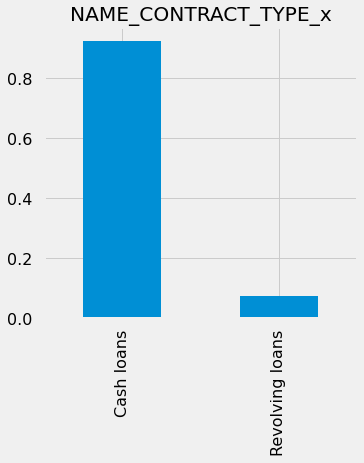

In [88]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib 
df['NAME_CONTRACT_TYPE_x'].value_counts(normalize=True).plot.bar()

# setting the title of the plot
plt.title("NAME_CONTRACT_TYPE_x")

# plot the graph
plt.show()

Inference : From the above Bar plot, we can see that the number of Cash loans is far more than the total number of 
    revolving loans (92 percent vs 7 percent).

In [89]:
#Printing the value counts of the NAME_CONTRACT_TYPE_y column of dataframe PDF
df["NAME_CONTRACT_TYPE_y"].value_counts(normalize=True)*100

Cash loans         44.334976
Consumer loans     44.228306
Revolving loans    11.414578
XNA                 0.022140
Name: NAME_CONTRACT_TYPE_y, dtype: float64

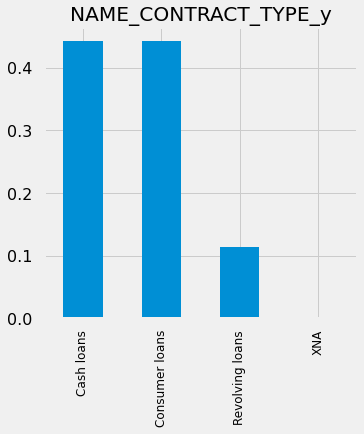

In [90]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['NAME_CONTRACT_TYPE_y'].value_counts(normalize=True).plot.bar()
# setting the title of the plot
plt.title("NAME_CONTRACT_TYPE_y")


#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# plot the graph
plt.show()

Inference : By taking a look at the above bar chart, we can conclude that the maximum number of applications have contract type
    as "Cash loans" and "Consumer loans" at 44 percent each and there is no data in "XNA" contract type. The least number of applications are for the name contract type "Revolving loans" at 11 percent.
    
    

#### 2. CODE_GENDER

In [91]:
#printing the value count of the field CODE_GENDER
df['CODE_GENDER'].value_counts(normalize=True)*100

F      67.563014
M      32.433096
XNA     0.003890
Name: CODE_GENDER, dtype: float64

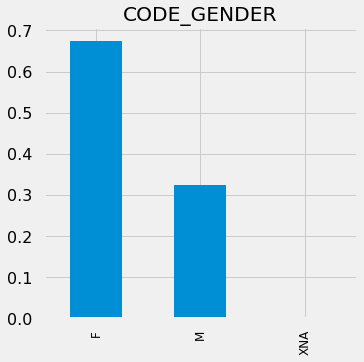

In [92]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['CODE_GENDER'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("CODE_GENDER")

# plot the graph
plt.show()

Inference : By looking at the above bar chart, we can observe that the majority of the applicants this year have been from
    the Female gender category and they have been given credit loans. Thus it is simply obvious that there is lesser risk
    in giving loans to Female category applicants than male category applicants who are at 32 percent(latter) in comparison to 67
    percent of the former.

#### 3. FLAG_OWN_CAR

In [93]:
#printing the value count of the field FLAG_OWN_CAR
df['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    66.292377
Y    33.707623
Name: FLAG_OWN_CAR, dtype: float64

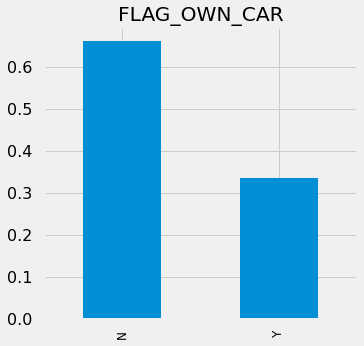

In [94]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("FLAG_OWN_CAR")

# plot the graph
plt.show()

Inference : Taking a look at above, we can say that the total applicants which applied for loans and received credit,
    have a major portion as 'N' in terms of owning a car at 66 percent, in comparison to those who don't own a car at
    33 percent. Thus, it seems that there is lesser risk at giving loans to those who don't own a car.

#### 4.  FLAG_OWN_REALTY

In [95]:
#printing the value count of the field FLAG_OWN_CAR
df['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    72.440495
N    27.559505
Name: FLAG_OWN_REALTY, dtype: float64

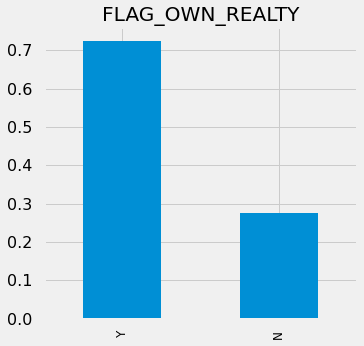

In [96]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("FLAG_OWN_REALTY")

# plot the graph
plt.show()

Inference : There is a majority of those applicants who own a realty or real estate as 72 percent, in comparison to those
    applicants who don't own a house or flat at 27 percent. Thus, there is lesser risk in giving loans to those who own
    a flat or house than those who don't.

#### 5. NAME_HOUSING_TYPE

In [97]:
#printing the value count of the field NAME_HOUSING_TYPE
df['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      89.478044
With parents            4.358347
Municipal apartment     3.645255
Rented apartment        1.399518
Office apartment        0.808375
Co-op apartment         0.310462
Name: NAME_HOUSING_TYPE, dtype: float64

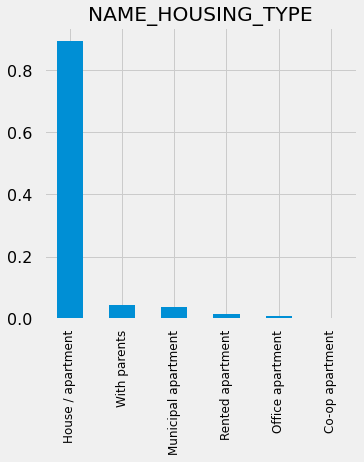

In [98]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("NAME_HOUSING_TYPE")

# plot the graph
plt.show()

Inference:Maximum number of loan applicant live in a house/apartment.

#### 6. NAME_FAMILY_STATUS

In [99]:
#printing the value count of the field NAME_HOUSING_TYPE
df['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 64.434417
Single / not married    13.203428
Civil marriage          10.126399
Separated                6.460914
Widow                    5.774842
Name: NAME_FAMILY_STATUS, dtype: float64

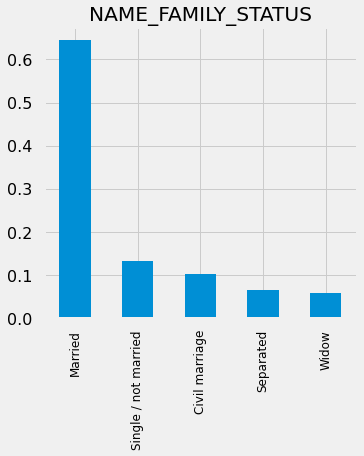

In [100]:
# plotting the barplot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("NAME_FAMILY_STATUS")

# plot the graph
plt.show()

Inference: Maximum number of loan applicant are Married in comparision to to the least number of loan applicant over widowed.

#### 7. NAME_EDUCATION_TYPE

In [101]:
#printing the value count of the field NAME_HOUSING_TYPE
df['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    73.417363
Higher education                 22.129503
Incomplete higher                 3.198060
Lower secondary                   1.214118
Academic degree                   0.040956
Name: NAME_EDUCATION_TYPE, dtype: float64

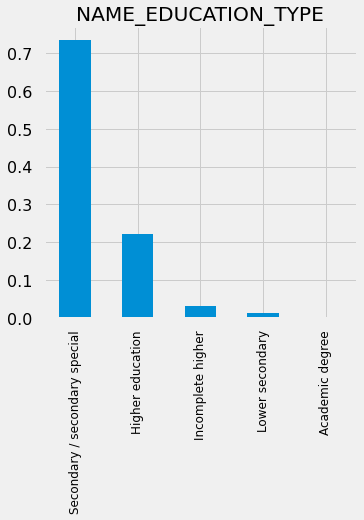

In [102]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum number of loan applicant have completed their secondary/secondary special education.

#### 8. NAME_INCOME_TYPE

In [103]:
#printing the value count of the field NAME_HOUSING_TYPE
df['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 51.219388
Commercial associate    22.740381
Pensioner               19.349495
State servant            6.679206
Unemployed               0.008701
Student                  0.001698
Maternity leave          0.001132
Name: NAME_INCOME_TYPE, dtype: float64

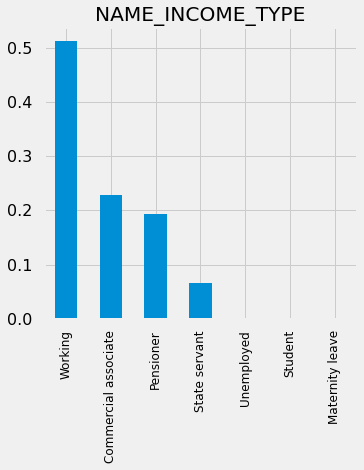

In [104]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum number of loan applicants are from the working class next to which are commercial associate , pensioner
    and state servant.

#### 9. OCCUPATION_TYPE

In [105]:
#printing the value count of the field OCCUPATION_TYPE
df[df['OCCUPATION_TYPE']!=0]['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.283180
Sales staff              15.830423
Core staff               12.369982
Managers                  9.929810
Drivers                   8.792506
High skill tech staff     5.070802
Accountants               4.388357
Medicine staff            4.183466
Security staff            3.315689
Cooking staff             3.004431
Cleaning staff            2.544448
Private service staff     1.279964
Low-skill Laborers        0.974772
Waiters/barmen staff      0.641341
Secretaries               0.600133
Realty agents             0.370664
HR staff                  0.241915
IT staff                  0.178116
0                         0.000000
Name: OCCUPATION_TYPE, dtype: float64

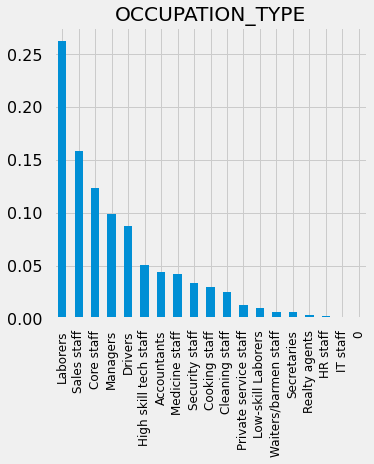

In [106]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df[df['OCCUPATION_TYPE']!=0]['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("OCCUPATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum number of loan applicants are laborers.

#### 10. FLAG_DOCUMENT_3

In [107]:
#printing the value count of the field FLAG_DOCUMENT_3
df['FLAG_DOCUMENT_3'].value_counts(normalize=True)*100

1    73.855999
0    26.144001
Name: FLAG_DOCUMENT_3, dtype: float64

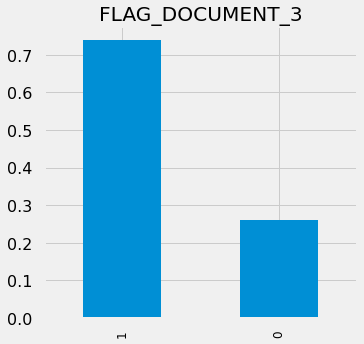

In [108]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['FLAG_DOCUMENT_3'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("FLAG_DOCUMENT_3")

# plot the graph
plt.show()

Infernece: By looking at the above graph we can observe that maximum number of loan applications have submitted FLAG_DOCUMENT_3
    and thus there loan applications have less risk factor associated with them in comparision to those applications where
    the value is 0 and no FLAG_DOCUMENT_3 has been submitted.

#### 11.AGE_GROUP

In [109]:
#printing the value count of the field AGE_GROUP
df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    33.508783
30-40       26.578817
40-50       24.656558
20-30       15.255560
0-20         0.000283
Name: AGE_GROUP, dtype: float64

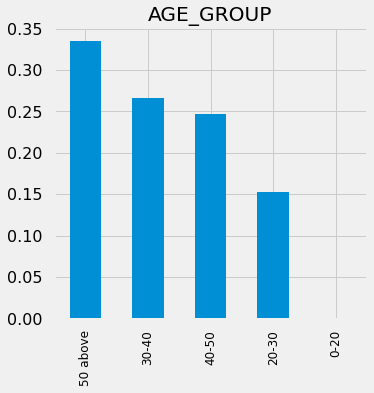

In [110]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['AGE_GROUP'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AGE_GROUP")

# plot the graph
plt.show()

Inference: The maximum number of loan applications have been submitted by and approved for the AGE_GROUP 50 and above this year.
    The next best AGE_GROUP are 30-40,40-50,20-30 in the respective order.

#### 12.EMPLOYMENT_YEAR

In [111]:
#printing the value count of the field EMPLOYMENT_YEAR
df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         51.447109
5-10        27.806308
10-20       15.837807
20-30        3.728091
30-40        1.088500
40-50        0.092185
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

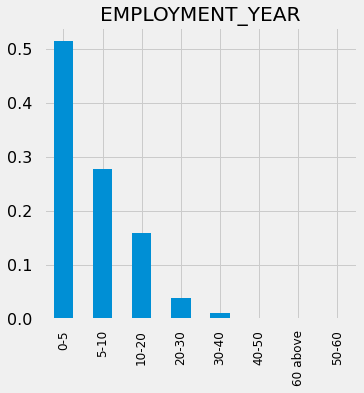

In [112]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['EMPLOYMENT_YEAR'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("EMPLOYMENT_YEAR")

# plot the graph
plt.show()

Inference:The maximum number of loan applicants belong to the employment period of 0-5 years. As the employment years increases
    the number of loan applications submitted and approved decreases. This means that bank considers the low experienced more
    for approving loan applications.

#### 13. AMT_CREDIT_RANGE

In [113]:
#printing the value count of the field AMT_CREDIT_RANGE_x of (ADF) dataframe
df['AMT_CREDIT_RANGE_x'].value_counts(normalize=True)*100

200k-300k    17.871459
1M Above     15.415353
500k-600k    11.345468
400k-500k    10.883490
100K-200K     9.280109
300k-400k     8.979056
600k-700k     7.832986
800k-900k     6.815585
700k-800k     6.393290
900k-1M       2.990802
0-100K        2.192401
Name: AMT_CREDIT_RANGE_x, dtype: float64

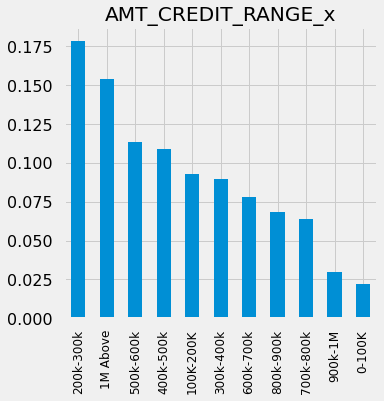

In [114]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['AMT_CREDIT_RANGE_x'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_RANGE_x")

# plot the graph
plt.show()

Infernece:The maximum amount of loan Sanctioned this Year belongs to the 200k-300k range.

In [115]:
#printing the value count of the field AMT_CREDIT_RANGE_y of (ADF) dataframe
df['AMT_CREDIT_RANGE_y'].value_counts(normalize=True)*100

0-100K       45.438884
100K-200K    22.087496
200k-300k    10.192037
1M Above      4.776264
400k-500k     4.546826
300k-400k     4.232700
500k-600k     2.841469
700k-800k     1.954142
600k-700k     1.620933
800k-900k     1.567113
900k-1M       0.742136
Name: AMT_CREDIT_RANGE_y, dtype: float64

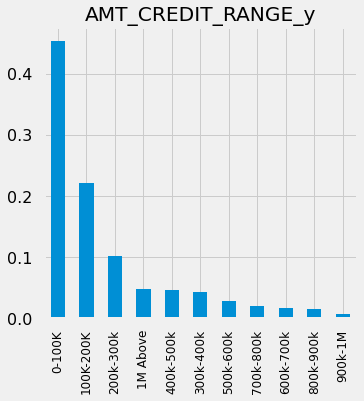

In [116]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['AMT_CREDIT_RANGE_y'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_RANGE_y")

# plot the graph
plt.show()

Inference: The amount of loan sanctioned maximum number of times, last year, belongs to 0-100k range.This means that last year
bank saw less risk associated with sanctioned of low amounts in credit than the current year.

#### 14. AMT_INCOME_RANGE 

In [117]:
#printing the value count of the field AMT_INCOME_RANGE
df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    51.147822
200k-300k    23.483890
0-100K       17.684059
300k-400k     5.217533
400k-500k     1.766212
500k-600k     0.355054
600k-700k     0.225545
800k-900k     0.071903
700k-800k     0.039561
900k-1M       0.006794
1M Above      0.001628
Name: AMT_INCOME_RANGE, dtype: float64

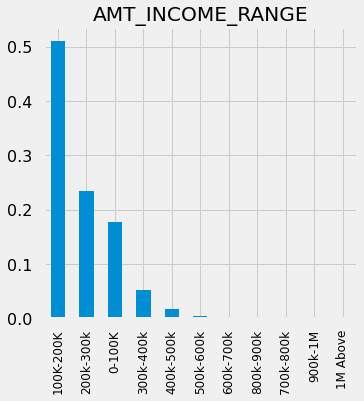

In [118]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['AMT_INCOME_RANGE'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE")

# plot the graph
plt.show()

Infernece: The salary earned by maximum number of applicants this year lies in the range of 100k-200k.

#### 15.CNT_FAM_MEMBERS

In [119]:
#printing the value count of the field CNT_FAM_MEMBERS
df['CNT_FAM_MEMBERS'].value_counts(normalize=True)*100

2.0     52.885582
1.0     21.414005
3.0     16.492667
4.0      7.894526
5.0      1.142462
6.0      0.131852
7.0      0.027446
8.0      0.006508
9.0      0.001203
12.0     0.001132
10.0     0.000637
20.0     0.000566
11.0     0.000424
16.0     0.000354
14.0     0.000283
13.0     0.000212
15.0     0.000141
Name: CNT_FAM_MEMBERS, dtype: float64

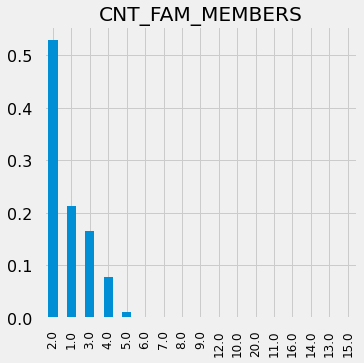

In [120]:
# plotting the bar plot 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the barplot using matplotlib
df['CNT_FAM_MEMBERS'].value_counts(normalize=True).plot.bar()

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("CNT_FAM_MEMBERS")

# plot the graph
plt.show()

Inference: The maximum nuber of loan applicants have a family that contains two members in total.

## Bivariate Analysis

### Catergoical Bivariate Analysis

#### 1.AMT_INCOME_RANGE VS AMT_CREDIT

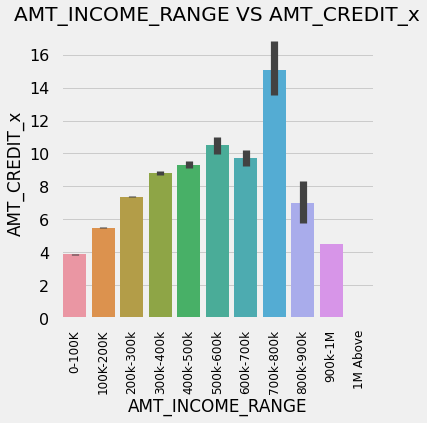

In [121]:
# plotting the AMT_INCOME_RANGE VS AMT_CREDIT_x 

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_CREDIT_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS AMT_CREDIT_x")

# plot the graph
plt.show()


Inference: The income range seems to be increasing in a linear fashion with respect to credit amount. So, as the income increases 
    the amount credit also increases. From 0 to 800k income icreases so credit increases as well and then it starts dropping for this year.

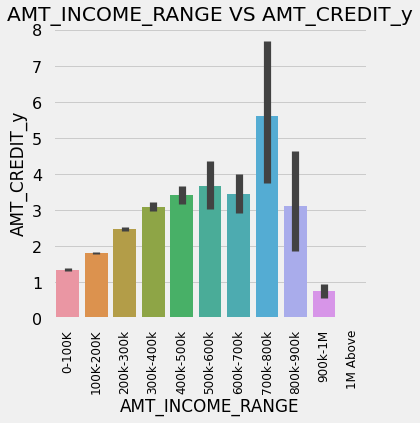

In [122]:
# plotting the AMT_INCOME_RANGE VS AMT_CREDIT_y

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_CREDIT_y',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS AMT_CREDIT_y")

# plot the graph
plt.show()

Inference: The credit amount increases in a linear fashion as income increases for the previous year. The highest proportional relationship
    is at 700k to 800k income range.

#### 2. AMT_INCOME_RANGE vs AMT_ANNUITY

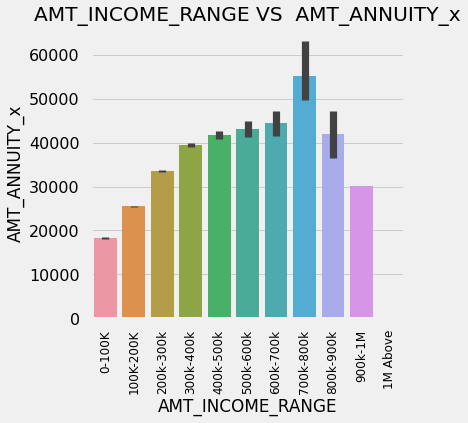

In [202]:
# plotting the AMT_INCOME_RANGE VS AMT_ANNUITY_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_ANNUITY_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS  AMT_ANNUITY_x")

# plot the graph
plt.show()

Inference: The annuity increases linearly upto 800k income since it depends on income range and after that it starts dropping for this year. 

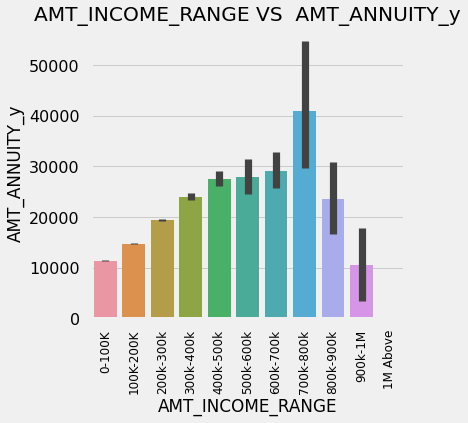

In [124]:
# plotting the AMT_INCOME_RANGE VS AMT_ANNUITY_y

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_ANNUITY_y',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS  AMT_ANNUITY_y")

# plot the graph
plt.show()

Inference: The annuity increases linearly upto 800k income since it depends on income range and after that it starts dropping for the 
    previous year.

#### 3. AMT_INCOME_RANGE vs AMT_GOODS_PRICE

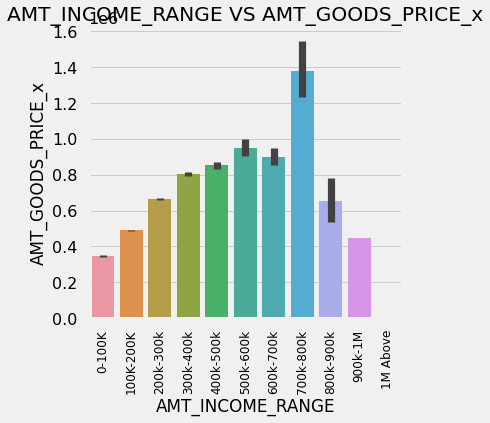

In [204]:
# plotting the AMT_INCOME_RANGE VS AMT_GOODS_PRICE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_GOODS_PRICE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS AMT_GOODS_PRICE_x")

# plot the graph
plt.show()

Inference: The goods price increases in the linear fashion upto 800k since it depends on income range and after that it 
    starts dropping for this year.

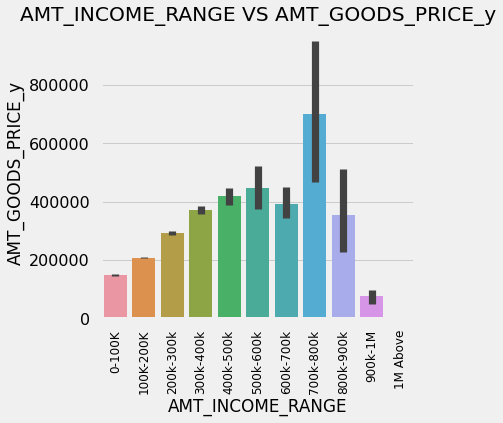

In [126]:
# plotting the AMT_INCOME_RANGE VS AMT_GOODS_PRICE_y

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='AMT_INCOME_RANGE' , y='AMT_GOODS_PRICE_y',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS AMT_GOODS_PRICE_y")

# plot the graph
plt.show()

Inference: The goods price increases in the linear fashion upto 800k since it depends on income range and after that it starts dropping for the previous year.

#### 4. AMT_INCOME_RANGE vs AGE

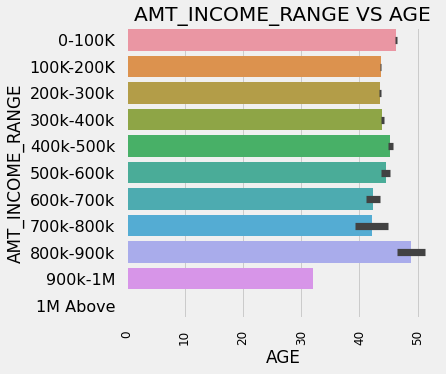

In [186]:
# plotting the AMT_INCOME_RANGE VS AGE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_INCOME_RANGE' , x='AGE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_INCOME_RANGE VS AGE")

# plot the graph
plt.show()

Inference: The amount of income earned doesn't depend upon the age of the applicants for this year's applications.

#### 5. AMT_CREDIT VS AMT_ANNUITY

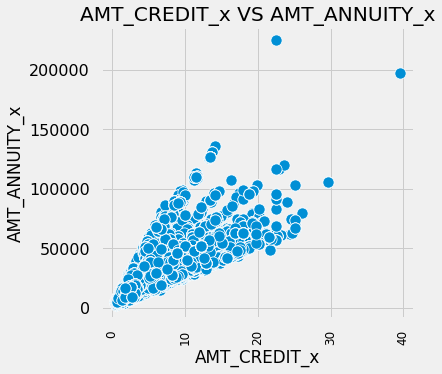

In [136]:
# plotting the AMT_CREDIT_x VS AMT_ANNUITY_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the scatter plot using seaborn
sns.scatterplot(x='AMT_CREDIT_x' , y='AMT_ANNUITY_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x VS AMT_ANNUITY_x")

# plot the graph
plt.show()

Inference: The amount annuity is directly proportional to the amount credit for this year.

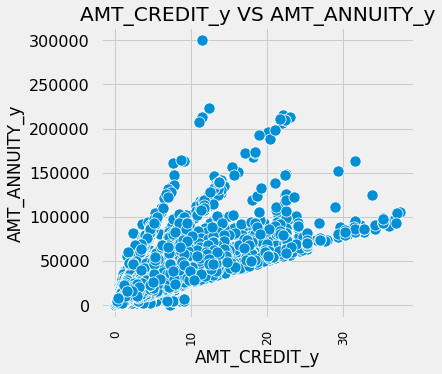

In [163]:
#plotting the AMT_CREDIT_y VS AMT_ANNUITY_y

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the scatter plot using seaborn
sns.scatterplot(x='AMT_CREDIT_y' , y='AMT_ANNUITY_y',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_y VS AMT_ANNUITY_y")

# plot the graph
plt.show()

Inference: The annuity amount is directly proportional to the credit amount for the previous year's applications.

#### 6. AMT_CREDIT vs AMT_GOODS_PRICE

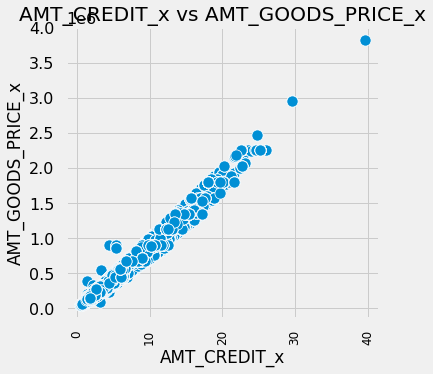

In [164]:
# plotting the AMT_CREDIT_x vs AMT_GOODS_PRICE_x


# setting the figure size
plt.figure(figsize=(5,5))

#plotting the scatter plot using seaborn
sns.scatterplot(x='AMT_CREDIT_x' , y='AMT_GOODS_PRICE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x vs AMT_GOODS_PRICE_x")

# plot the graph
plt.show()

Inference: The goods price amount is directly proportional to the credit amount for the current year's applications.

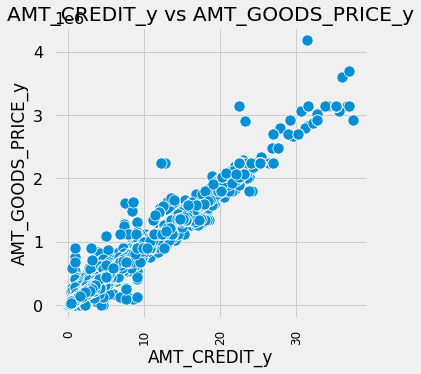

In [167]:
# plotting the AMT_CREDIT_y vs AMT_GOODS_PRICE_y


# setting the figure size
plt.figure(figsize=(5,5))

#plotting the scatter plot using seaborn
sns.scatterplot(x='AMT_CREDIT_y' , y='AMT_GOODS_PRICE_y',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_y vs AMT_GOODS_PRICE_y")

# plot the graph
plt.show()

Inference: The goods price amount is directly proportional to the credit amount for the previous year's applications.

#### 7. AMT_CREDIT_ vs NAME_TYPE_SUITE

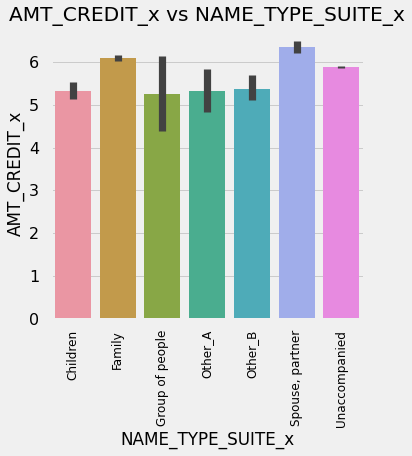

In [168]:
# Plotting AMT_CREDIT_x vs NAME_TYPE_SUITE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_CREDIT_x' , x='NAME_TYPE_SUITE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x vs NAME_TYPE_SUITE_x")

# plot the graph
plt.show()

Inference: The maximum amount of credit was passed for the incoming group which contained Spouse,partner after which comes the
    family as the next best credit loan group. 

#### 8. AMT_CREDIT vs NAME_INCOME_TYPE

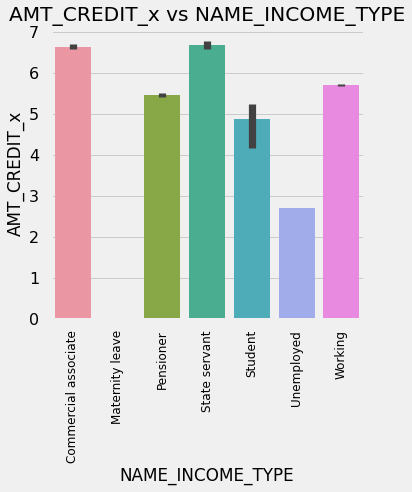

In [170]:
# Plotting AMT_CREDIT_x vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_CREDIT_x' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum loan amount was credited to Commercial associate and state servant in comparison to other income types for current year. 

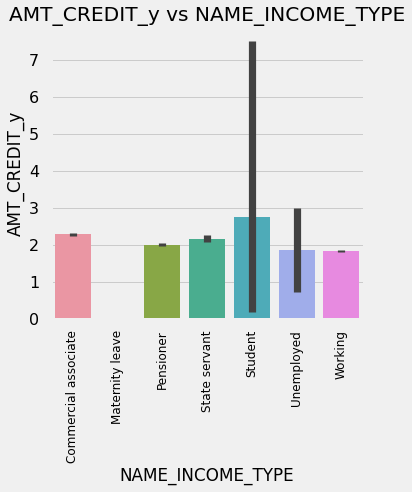

In [171]:
# Plotting AMT_CREDIT_y vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_CREDIT_y' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_y vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum loan amount was passed for Student income type in comparison to others in the previous year.

#### 9. AMT_CREDIT vs NAME_EDUCATION_TYPE

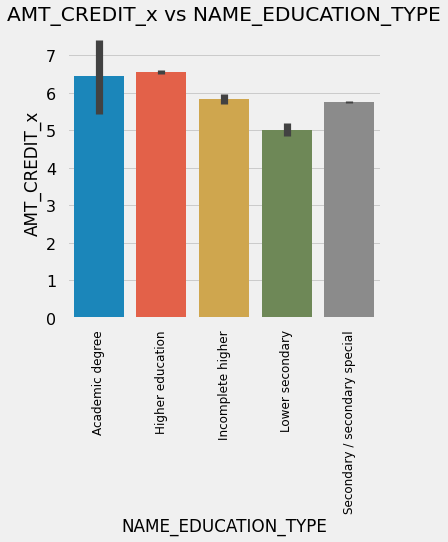

In [172]:
# Plotting AMT_CREDIT_x vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_CREDIT_x' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

 Inference: The maximum amount of credit was sanctioned for applicants with higher education degree after which the next best
    education type was Academic degree for the current year applications.

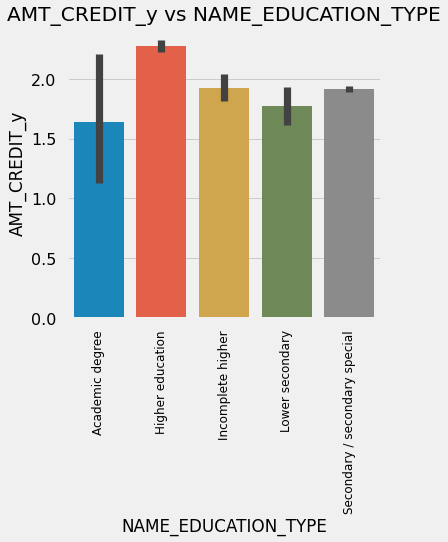

In [173]:
# Plotting AMT_CREDIT_y vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_CREDIT_y' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_y vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of credit was sanctioned for applicants with higher education degree after which the next best
    education types were Incomplete higher and Secondary degree for the previous year applications.

#### 10. AMT_ANNUITY vs NAME_TYPE_SUITE
 

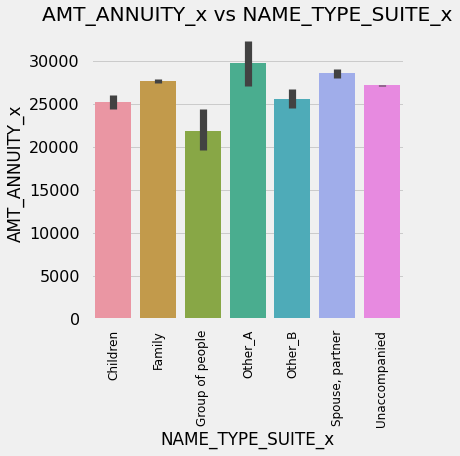

In [174]:
# Plotting AMT_ANNUITY_x vs NAME_TYPE_SUITE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_x' , x='NAME_TYPE_SUITE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_x vs NAME_TYPE_SUITE_x")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debits from those applicants who came with Other_A type of people at the time of loan application for the current year.

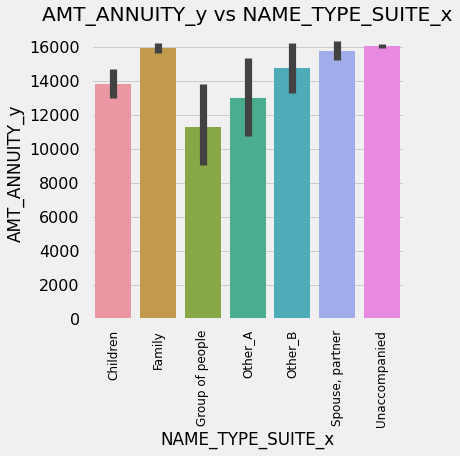

In [175]:
# Plotting AMT_ANNUITY_y vs NAME_TYPE_SUITE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_y' , x='NAME_TYPE_SUITE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_y vs NAME_TYPE_SUITE_x")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debits from those applicants who came with Family or Unaccompanied type of people at the time of loan application 
    for the previous year.

#### 11. AMT_ANNUITY vs NAME_INCOME_TYPE

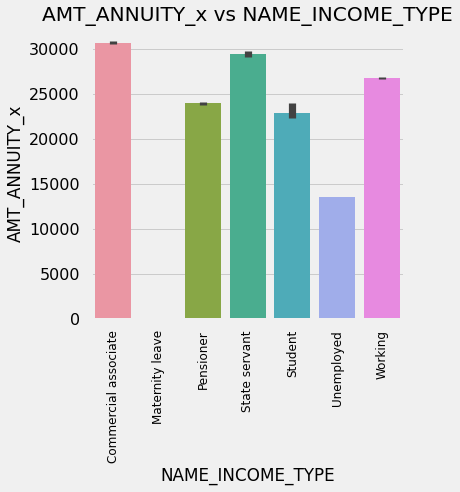

In [176]:
# Plotting AMT_ANNUITY_x vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_x' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_x vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debits from Commerical associate income type people,for the current year.

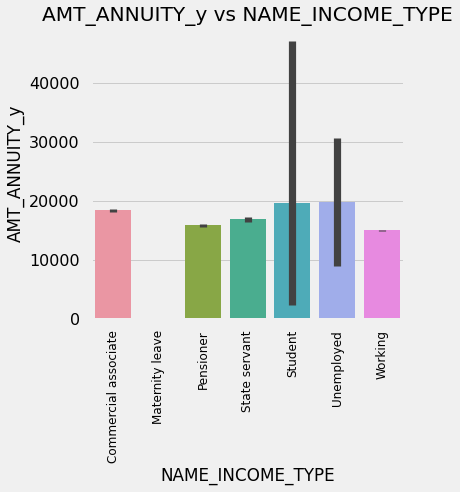

In [206]:
# Plotting AMT_ANNUITY_y vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_y' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_y vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debited from Student and Unemployed income type people,for the previous year.

#### 12. AMT_ANNUITY  vs NAME_EDUCATION_TYPE

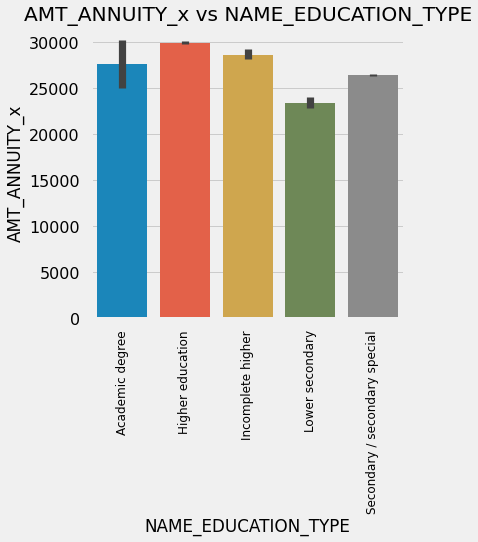

In [178]:
# Plotting AMT_ANNUITY_x vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_x' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_x vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debits from Higher education type applicants for current year.

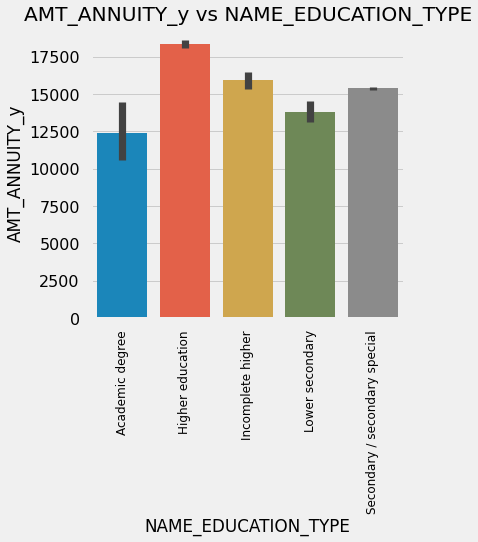

In [179]:
# Plotting AMT_ANNUITY_y vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_ANNUITY_y' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_y vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of annuity debits from Higher education type applicants for the previous year.

#### 13. AMT_GOODS_PRICE vs NAME_TYPE_SUITE


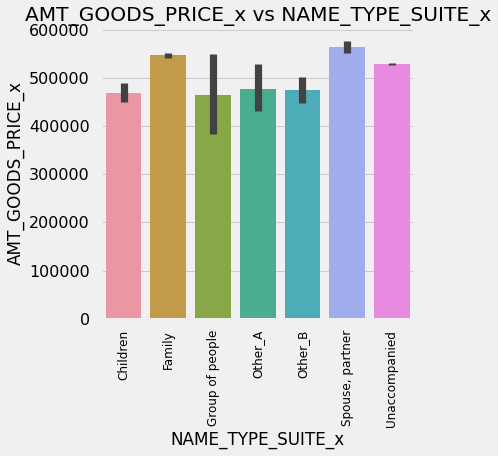

In [180]:
# Plotting AMT_GOODS_PRICE_x vs NAME_TYPE_SUITE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_x' , x='NAME_TYPE_SUITE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_x vs NAME_TYPE_SUITE_x")

# plot the graph
plt.show()

Inference: The maximum amount of goods price is spent by the Spouse,partner in comparison to other support groups at the time of 
    application in the current year.

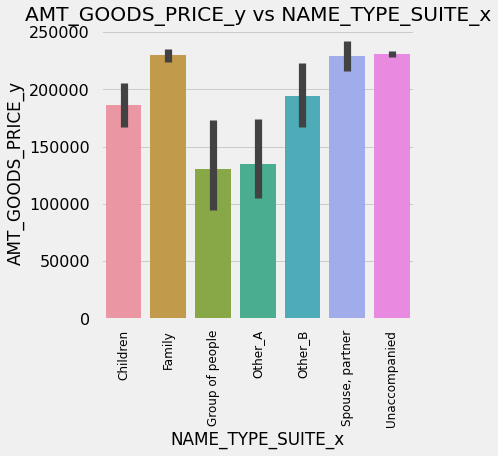

In [181]:
# Plotting AMT_GOODS_PRICE_y vs NAME_TYPE_SUITE_x

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_y' , x='NAME_TYPE_SUITE_x',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_y vs NAME_TYPE_SUITE_x")

# plot the graph
plt.show()

Inference: The maximum amount of goods price is spent by the Spouse,partner or Unaccompanied or family in comparison to other support groups at the time of application in the previous year.

#### 14. AMT_GOODS_PRICE vs NAME_INCOME_TYPE

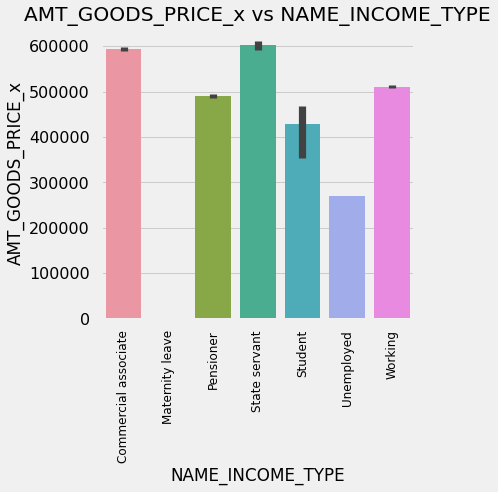

In [182]:
# Plotting AMT_GOODS_PRICE_x vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_x' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_x vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of goods price is spent by state servant income type applicants followed by commercial associate applicants for the current year.

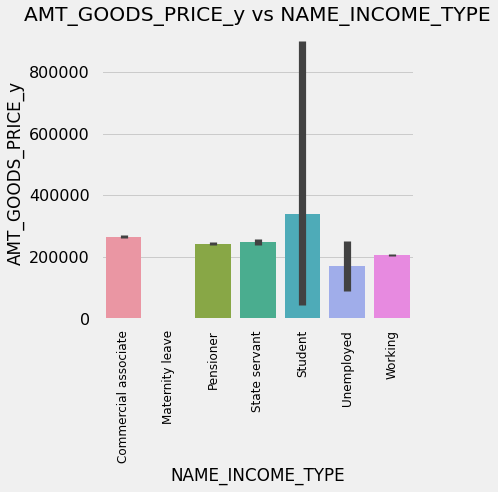

In [183]:
# Plotting AMT_GOODS_PRICE_y vs NAME_INCOME_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_y' , x='NAME_INCOME_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_y vs NAME_INCOME_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of goods price is spent by student income type applicants followed by commercial associate applicants for the previous year.

#### 15. AMT_GOODS_PRICE vs NAME_EDUCATION_TYPE

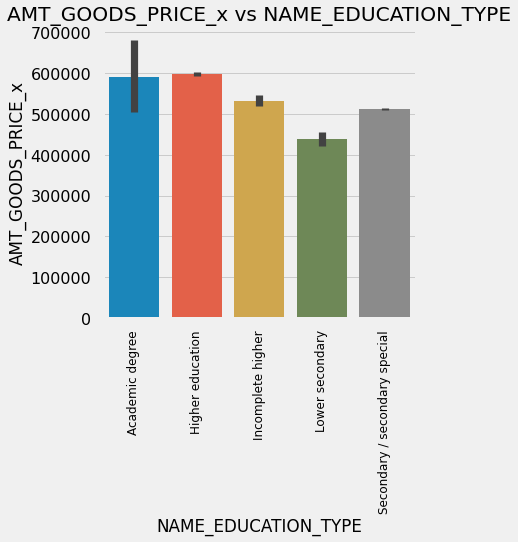

In [184]:
# Plotting AMT_GOODS_PRICE_x vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_x' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_x vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of goods price was spent by higher education type applicants followed by academic degree for this year.

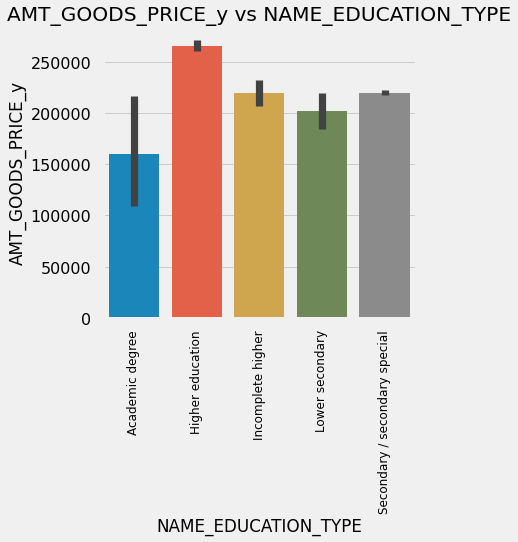

In [185]:
# Plotting AMT_GOODS_PRICE_y vs NAME_EDUCATION_TYPE

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(y='AMT_GOODS_PRICE_y' , x='NAME_EDUCATION_TYPE',data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_y vs NAME_EDUCATION_TYPE")

# plot the graph
plt.show()

Inference: The maximum amount of goods price was spent by higher education type applicants followed by incomplete higher type for the previous  year.

#### 16.AMT_CREDIT vs TARGET

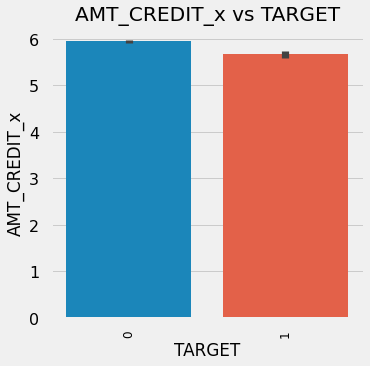

In [195]:
# Plotting AMT_CREDIT_x vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_CREDIT_x' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_x vs TARGET")

plt.show()

Inference: The repayers of the loan have more loan credit passed than the defaulters for the current year.

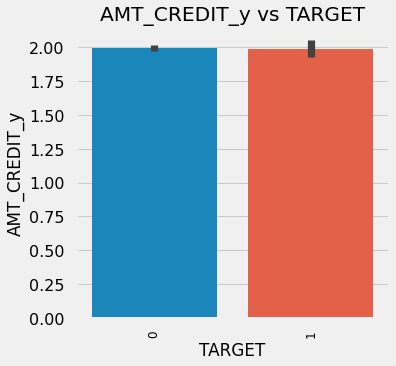

In [197]:
# Plotting AMT_CREDIT_y vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_CREDIT_y' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_CREDIT_y vs TARGET")

plt.show()

Inference: The repayers of the loan have almost same loan credit passed as the defaulters for the previous year.

#### 17. AMT_GOODS_PRICE vs TARGET

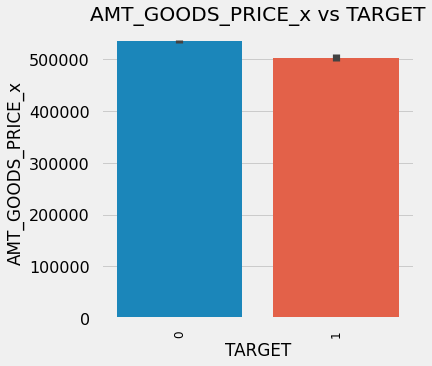

In [217]:
# Plotting AMT_GOODS_PRICE_x vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_GOODS_PRICE_x' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_x vs TARGET")

plt.show()

Inference: The maximum amount of goods price  was spent by the repayers in comparison to defaulters for the current year.

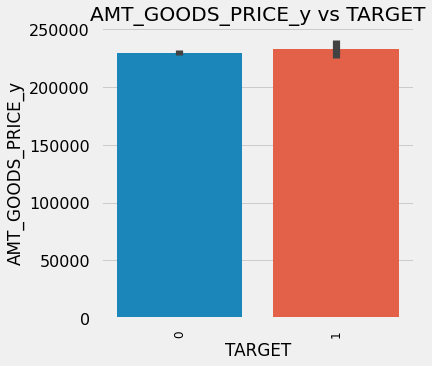

In [218]:
# Plotting AMT_GOODS_PRICE_y vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_GOODS_PRICE_y' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_GOODS_PRICE_y vs TARGET")

plt.show()

Inference: The maximum amount of goods price was spent by the defaulters in comparison to repayers for the previous year.

#### 18.AMT_ANNUITY vs TARGET

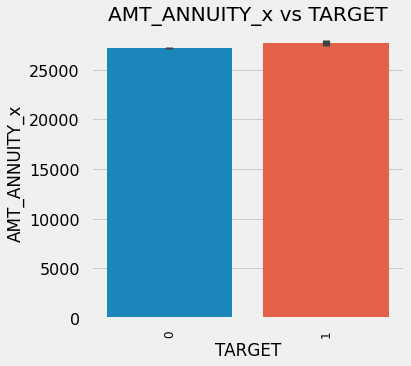

In [200]:
# Plotting AMT_ANNUITY_x vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_ANNUITY_x' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_x vs TARGET")

plt.show()

Inference: The amount annuity debited from the repayers and defaulters was almost same for the current year.

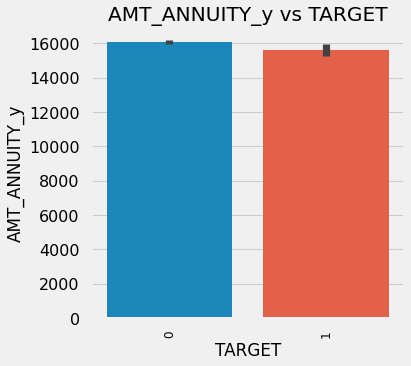

In [201]:
# Plotting AMT_ANNUITY_y vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='AMT_ANNUITY_y' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("AMT_ANNUITY_y vs TARGET")

plt.show()

Inference: The amount annuity  debited from the repayers is more than the defaulters  for the previous year.

#### 19. DAYS_EMPLOYED vs TARGET

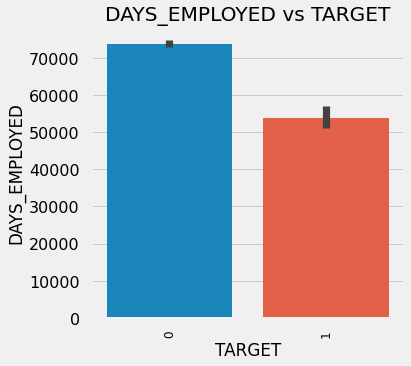

In [219]:
# Plotting DAYS_EMPLOYED vs TARGET

# setting the figure size
plt.figure(figsize=(5,5))

#plotting the bar plot using seaborn
sns.barplot(x='TARGET' , y='DAYS_EMPLOYED' , data=df.head(100000))

#rotating the axis of the x-axis label or ticks
plt.xticks(rotation =90,fontsize =12)

# setting the title of the plot
plt.title("DAYS_EMPLOYED vs TARGET")

plt.show()

Inference: Those who have been employed more days are repayers in comparison to defaulters. 

## Multivariate Analysis

In [209]:
# Bifurcating the merged dataframe df based on Target column value 0 and 1 for correlation and other analysis by selecting some
# specific cloumns
COL_FOR_CORELATIONS = ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_CREDIT_y', 'AMT_ANNUITY_x', 'AMT_ANNUITY_y',
                         'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y', 
                        'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Creating two new dataframes based on Target column value
Repayer_df = df.loc[df['TARGET']==0, COL_FOR_CORELATIONS] # Repayers
Defaulter_df = df.loc[df['TARGET']==1, COL_FOR_CORELATIONS] # Defaulters


In [210]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
178,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.993299
152,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.986593
325,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878475
180,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.821027
128,AMT_ANNUITY_y,AMT_CREDIT_y,0.816541
154,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.763653
102,AMT_ANNUITY_x,AMT_CREDIT_x,0.759440
259,DAYS_EMPLOYED,DAYS_BIRTH,0.635074
101,AMT_ANNUITY_x,AMT_INCOME_TOTAL,0.402081
225,DAYS_BIRTH,CNT_CHILDREN,0.369160


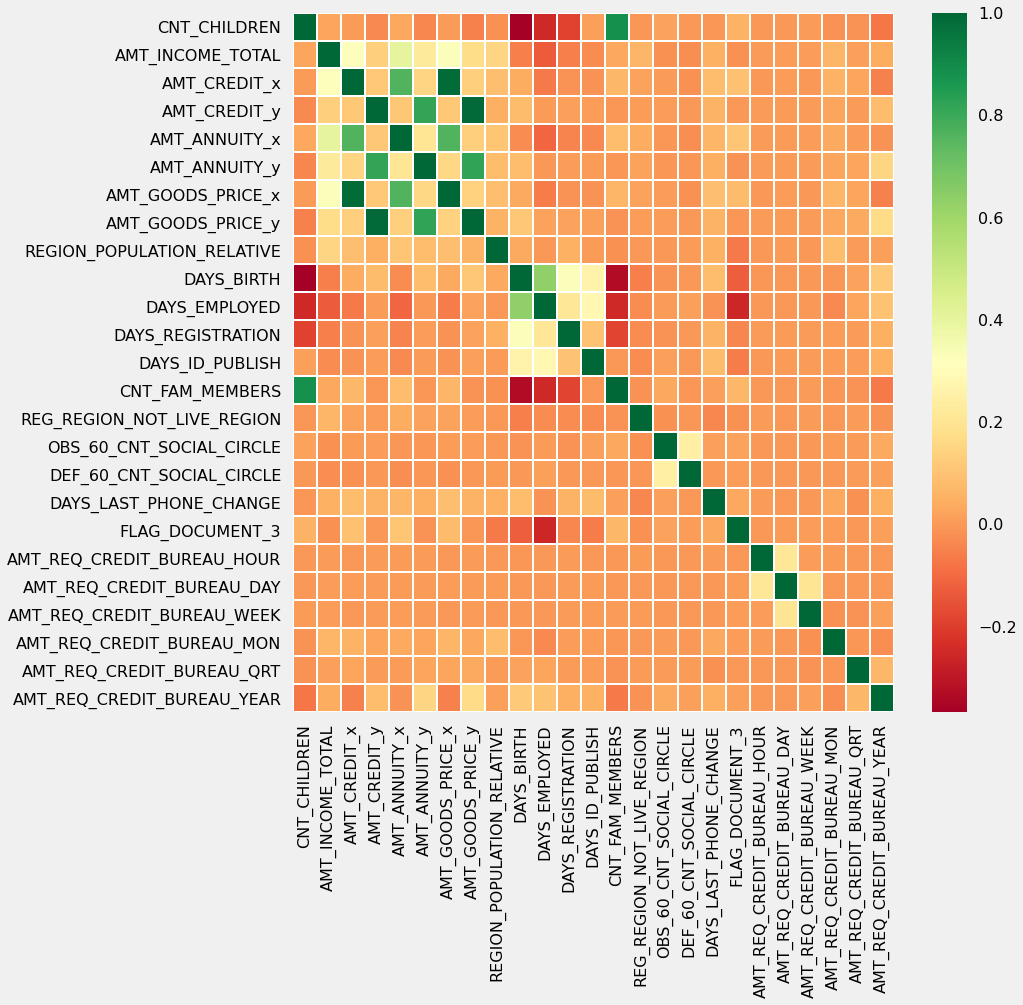

In [211]:
#Plotting the heatmap Repayer data

#setting the figure size
fig = plt.figure(figsize=(12,12))

# plotting the plot using seaborn
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Inference: Below fields have high corelation between them with respect to repayers:
 
1. CNT_FAM_MEMBERS vs CNT_CHILDREN
2. DAYS_EMPLOYED vs DAYS_BIRTH
3. AMT_GOODS_PRICE_x vs AMT_CREDIT_x for current year
4. AMT_GOODS_PRICE_y vs AMT_CREDIT_y for previous year
5. AMT_ANNUITY_x vs AMT_CREDIT_x for current year
6. AMT_ANNUITY_y vs AMT_CREDIT_y for previous year
7. AMT_GOODS_PRICE_x vs AMT_ANNUITY_x for current year
8. AMT_GOODS_PRICE_y vs AMT_ANNUITY_y for previous year


In [212]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
178,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.992302
152,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.982912
325,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886300
128,AMT_ANNUITY_y,AMT_CREDIT_y,0.840461
180,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.840196
102,AMT_ANNUITY_x,AMT_CREDIT_x,0.745679
154,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.745604
259,DAYS_EMPLOYED,DAYS_BIRTH,0.586953
225,DAYS_BIRTH,CNT_CHILDREN,0.295111
460,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.284317


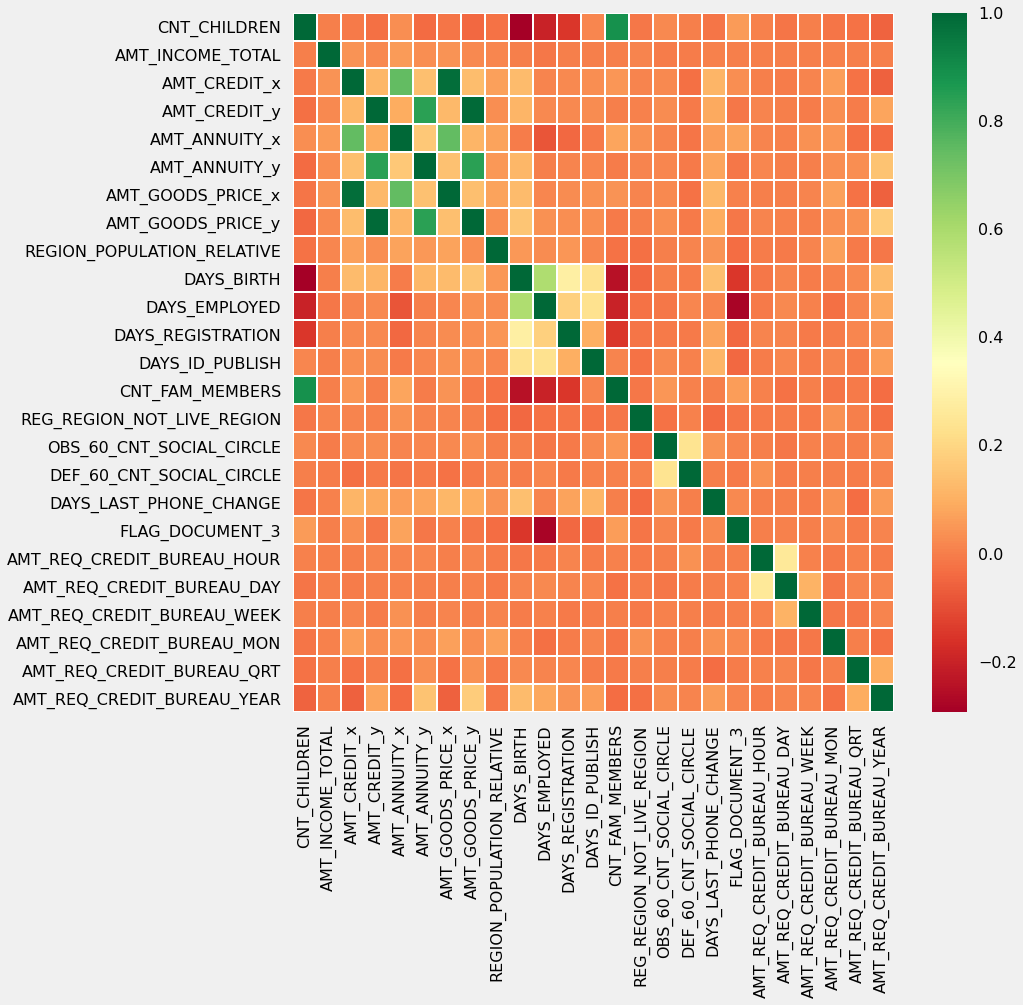

In [213]:
# plotting the heatmap for Defaulter data

# setting the figure size
fig = plt.figure(figsize=(12,12))

# plotting the plot using the seaborn
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Inference: Below fields have high corelation between them with respect to defaulters:

1. CNT_CHILDREN vs CNT_FAM_MEMBERS
2. AMT_ANNUITY_x vs AMT_CREDIT_x for current year
3. AMT_ANNUITY_y vs AMT_CREDIT_y for previous year
4. AMT_GOODS_PRICE_x vs AMT_CREDIT_x for current year
5. AMT_GOODS_PRICE_y vs AMT_CREDIT_y for previous year
6. AMT_GOODS_PRICE_x vs AMT_ANNUITY_x for current year
7. AMT_GOODS_PRICE_y vs AMT_ANNUITY_y for previous year

# CONCLUSION

After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

1.  If we check the above Value counts output, then we can be sure that more than 50% of the applicants have Total Income in the range of 100K-200K. The next highest proportion of the people lie in the range of 200K-300K with percentage of 23%.If we aggregate the above percentages and their respective value range, then we observe that around 96% applicants for loan have Income below 400K range.

2. we can clearly see that maximum number of loan applicants i.e. 17 percent have been sanctioned a loan in the amount range 200K-300K. The next highest bucket of applicants goes to 15% where the amount of loan sanctioned or the Credit Amount is 1 Million or above for the current year. The highest proportion of the sanctioned loan applications last year were almost 45% where the credit range was between 0-100K for the previous year

3. The most number of applicants whose applications have been sanctioned or approved belong to the age group 50 and Above, with proportion equal to 33 percent. The next best group is 30-40 with 26 percent, since this is the medium age group and also the age group which generally earns a wholesome salary.

4. we can figure out that the maximum number of applicants, about 51 percent, have been employed since 0-5 years. The other inference that can be extracted from the data is that the minimum proportion of loan applicants belong to the employment group 50 and above.

5. we can predict that out of the total values that are present in the TARGET column, if we take 1 as defaulter and 0 as repayer, the there is an imbalance in the values. 0 taken precendence over the 1 value in target column in huge proportion.

6. we can see that the number of Cash loans is far more than the total number of revolving loans (92 percent vs 7 percent) for the current year. we can conclude that the maximum number of applications have contract type as "Cash loans" and "Consumer loans" at 44 percent each and there is no data in "XNA" contract type. The least number of applications are for the name contract type "Revolving loans" at 11 percent for the previous year.

7. we can observe that the majority of the applicants this year have been from the Female gender category and they have been given credit loans. Thus it is simply obvious that there is lesser risk in giving loans to Female category applicants than male category applicants who are at 32 percent(latter) in comparison to 67 percent of the former.

8. There is a majority of those applicants who own a realty or real estate as 72 percent, in comparison to those applicants who don't own a house or flat at 27 percent. Thus, there is lesser risk in giving loans to those who own a flat or house than those who don't.

9. Maximum number of loan applicant live in a house/apartment.

10.  Maximum number of loan applicant are Married in comparision to to the least number of loan applicant over widowed.

11.  By looking at the above graph we can observe that maximum number of loan applications have submitted FLAG_DOCUMENT_3 and thus there loan applications have less risk factor associated with them in comparision to those applications where the value is 0 and no FLAG_DOCUMENT_3 has been submitted.

12. The maximum amount of loan Sanctioned this Year belongs to the 200k-300k range.
    The amount of loan sanctioned maximum number of times, last year, belongs to 0-100k range.This means that last year bank   saw less risk associated with sanctioned of low amounts in credit than the current year. 

13. The salary earned by maximum number of applicants this year lies in the range of 100k-200k.

14. The maximum nuber of loan applicants have a family that contains two members in total.

15. The income range seems to be increasing in a linear fashion with respect to credit amount. So, as the income increases the amount credit also increases. From 0 to 800k income icreases so credit increases as well and then it starts dropping for this year. The credit amount increases in a linear fashion as income increases for the previous year. The highest proportional relationship is at 700k to 800k income range.

16. The amount annuity is directly proportional to the amount credit for this year.The annuity amount is directly proportional to the credit amount for the previous year's applications.

17. The maximum loan amount was credited to Commercial associate and state servant in comparison to other income types for current year.The maximum loan amount was passed for Student income type in comparison to others in the previous year.

18. The maximum amount of credit was sanctioned for applicants with higher education degree after which the next best education type was Academic degree for the current year applications.The maximum amount of credit was sanctioned for applicants with higher education degree after which the next best education types were Incomplete higher and Secondary degree for the previous year applications.

19. Those who have been employed more days are repayers in comparison to defaulters.

20. AMT_GOODS_PRICE and AMT_ANNUITY are directly proportional to AMT_CREDIT field in both current and previous year.
